$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score

----------------------------

# `02` Load & Split Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
train = pd.read_csv('train.csv')

<ipython-input-3-f1a1f2ce149f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [ ]:
train.sample(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
50130,0x13bbc,CUS_0x520a,March,Matt Scuffhamw,25,175-12-3956,Media_Manager,14544.27,1395.022500,4,...,_,2634.91,23.137172,9 Years and 4 Months,Yes,21.680627,109.51580267984706,Low_spent_Small_value_payments,298.3058204230591,Standard
46563,0x126d5,CUS_0x5ef2,April,Baseso,20,556-28-1765,Architect,17804.96,1246.746667,4,...,_,1226.09,25.466934,18 Years and 2 Months,No,20.936581,166.28567301350432,Low_spent_Small_value_payments,227.45241259921562,Standard
12390,0x5e98,CUS_0x9135,July,Dominice,36,949-97-8482,Journalist,19567.0_,1681.583333,7,...,_,2202.33,23.685534,18 Years and 5 Months,Yes,86.443556,115.9481797127368,High_spent_Small_value_payments,225.7665975296736,Poor
41265,0x107cb,CUS_0x585c,February,Spicerx,39,212-80-7573,Teacher,16154.255,1506.187917,6,...,_,1232.63,33.114815,17 Years and 3 Months,Yes,28440.000000,101.52128943934713,Low_spent_Small_value_payments,315.0696597400452,Standard
3025,0x27bb,CUS_0xb560,February,Laurentv,22,221-90-6592,Architect,62223.06,5326.255000,7,...,_,1230.58,25.144984,NaN,Yes,120.358106,118.0754926808025,High_spent_Small_value_payments,554.1919017394329,Standard
11630,0x5a24,CUS_0xbb95,July,LaCapra Grantj,20,342-02-2232,Engineer,61600.83,5313.402500,7,...,Standard,2062.09,35.386604,19 Years and 3 Months,Yes,125.505022,142.20532098422132,Low_spent_Medium_value_payments,543.6299072902772,Standard
64194,0x18e24,CUS_0x30eb,March,Elvinah,18,705-82-0366,Entrepreneur,31944.72,2417.060000,4,...,Standard,696.79,30.864578,8 Years and 9 Months,Yes,83.713975,56.44551767529341,High_spent_Medium_value_payments,351.54650753931037,Standard
6236,0x3a8a,CUS_0xacd4,May,Ransdellf,37,988-25-1226,Manager,20651.43,1610.952500,10,...,Bad,2037.64,27.321262,13 Years and 2 Months,Yes,46.774079,110.03281955846077,Low_spent_Small_value_payments,294.2883513806068,Poor
15346,0x6fec,CUS_0x387a,March,Henryp,21,432-76-8859,Architect,18707.73,1751.977500,10,...,Bad,1362.32,29.098279,19 Years and 0 Months,NM,58.185334,__10000__,Low_spent_Small_value_payments,176.12499283876252,Poor
23218,0x9e0c,CUS_0x1a2f,March,Lorrainey,53,894-09-8608,Journalist,152340.56,12568.046667,5,...,_,329.18,40.089819,26 Years and 5 Months,No,422.793949,476.4784775786038,High_spent_Small_value_payments,617.5322401709122,Standard


Split data via the method you see fit to ensure that you can estimate the generalization error.

In [ ]:
X=train.drop('Credit_Score',axis=1)
y=train['Credit_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53860, 27), (13465, 27), (53860,), (13465,))

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53860, 27), (4040, 27), (53860,), (4040,))

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


#### show the columns of dataset

In [ ]:
X_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#### show some information about dataset

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53860 entries, 40248 to 58067
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53860 non-null  object 
 1   Customer_ID               53860 non-null  object 
 2   Month                     53860 non-null  object 
 3   Name                      48571 non-null  object 
 4   Age                       53860 non-null  object 
 5   SSN                       53860 non-null  object 
 6   Occupation                53860 non-null  object 
 7   Annual_Income             53860 non-null  object 
 8   Monthly_Inhand_Salary     45797 non-null  float64
 9   Num_Bank_Accounts         53860 non-null  int64  
 10  Num_Credit_Card           53860 non-null  int64  
 11  Interest_Rate             53860 non-null  int64  
 12  Num_of_Loan               53860 non-null  object 
 13  Type_of_Loan              47836 non-null  object 
 14  Delay_f

#### Check the duplicated

In [ ]:
X_train.duplicated().sum()

0

#### Check the missing values in each column

In [ ]:
X_train.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5289
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,8063
Num_Bank_Accounts,0


In [ ]:
X_train=X_train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan','Monthly_Inhand_Salary'], axis = 1)

In [ ]:
X_train.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40248,17,Teacher,59304.2,10,10,24,3,60,24,2.47,12.0,Bad,1945.03,39.966859,12 Years and 5 Months,Yes,76.875282,58.613151939767725,High_spent_Large_value_payments,601.7132328732066
61634,47,Media_Manager,127160.94,4,7,3,2,10,3,3.55,3.0,Good,559.07,29.627763,27 Years and 4 Months,No,136.126761,863.4399577027345,Low_spent_Medium_value_payments,364.50778095684194
62461,34,Entrepreneur,17831.05,6,5,16,3,18,18,16.4,6.0,Standard,1691.54,31.756928,7 Years and 0 Months,Yes,42.793004,78.96196417194348,!@9#%8,306.53711556220935
52376,20,Journalist,63515.92,3,7,3,1,3,0,0.65,4.0,Good,609.25,26.336111,30 Years and 9 Months,No,29.289365,426.61817767005914,Low_spent_Medium_value_payments,380.7917907507354
59061,21,Mechanic,32061.94,4,3,6,0,3,4,2.56,3.0,Good,1443.42,25.859648,21 Years and 4 Months,No,0.000000,57.33471542609442,High_spent_Small_value_payments,440.04811790723886


In [ ]:
X_train.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,53860.000000,53860.000000,53860.000000,53860.000000,52866.000000,53860.000000,53859.000000
mean,17.084812,23.418400,70.970572,21.068808,27.264348,32.302166,1446.851137
std,117.646080,133.353037,458.015341,14.779907,188.300885,5.106807,8445.510088
min,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,3.000000,4.000000,8.000000,10.000000,3.000000,28.080539,31.209570
50%,6.000000,6.000000,14.000000,18.000000,6.000000,32.338026,70.054459
75%,7.000000,7.000000,20.000000,28.000000,9.000000,36.499708,162.972042
max,1798.000000,1499.000000,5788.000000,67.000000,2594.000000,50.000000,82256.000000


#### Check unique value in Age column and value counts to can ditribute this column

In [ ]:
X_train['Age'].unique()

array(['17', '47', '34', ..., '2047', '1990', '6733'], dtype=object)

There is alot of unclean value that countain in this column

In [ ]:
X_train['Age'].value_counts().sort_values(ascending=False)

,count
Age,
32,1623
26,1586
31,1558
25,1553
28,1516
...,...
3681,1
1816,1
5524,1


#### Show the statistical analysis for the age column

In [ ]:
X_train['Age'].describe()

,Age
count,53860
unique,1039
top,32
freq,1623


In [ ]:
X_train['Age'].unique()

array(['17', '47', '34', ..., '2047', '1990', '6733'], dtype=object)

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

In [ ]:
X_train.dtypes

,0
Age,object
Occupation,object
Annual_Income,object
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,object


#### Show the unique values in Occupation column

In [ ]:
X_train['Occupation'].unique()

array(['Teacher', 'Media_Manager', 'Entrepreneur', 'Journalist',
       'Mechanic', 'Writer', 'Scientist', 'Doctor', 'Musician',
       'Engineer', 'Accountant', 'Lawyer', 'Developer', '_______',
       'Architect', 'Manager'], dtype=object)

#### Show the value counts in Occupation column

In [ ]:
X_train['Occupation'].value_counts().sort_values(ascending=False)

,count
Occupation,
_______,3726
Lawyer,3564
Architect,3477
Entrepreneur,3418
Journalist,3417
Scientist,3386
Developer,3360
Engineer,3357
Accountant,3328


#### Show the visual of the Occupation column

<Axes: xlabel='count', ylabel='Occupation'>

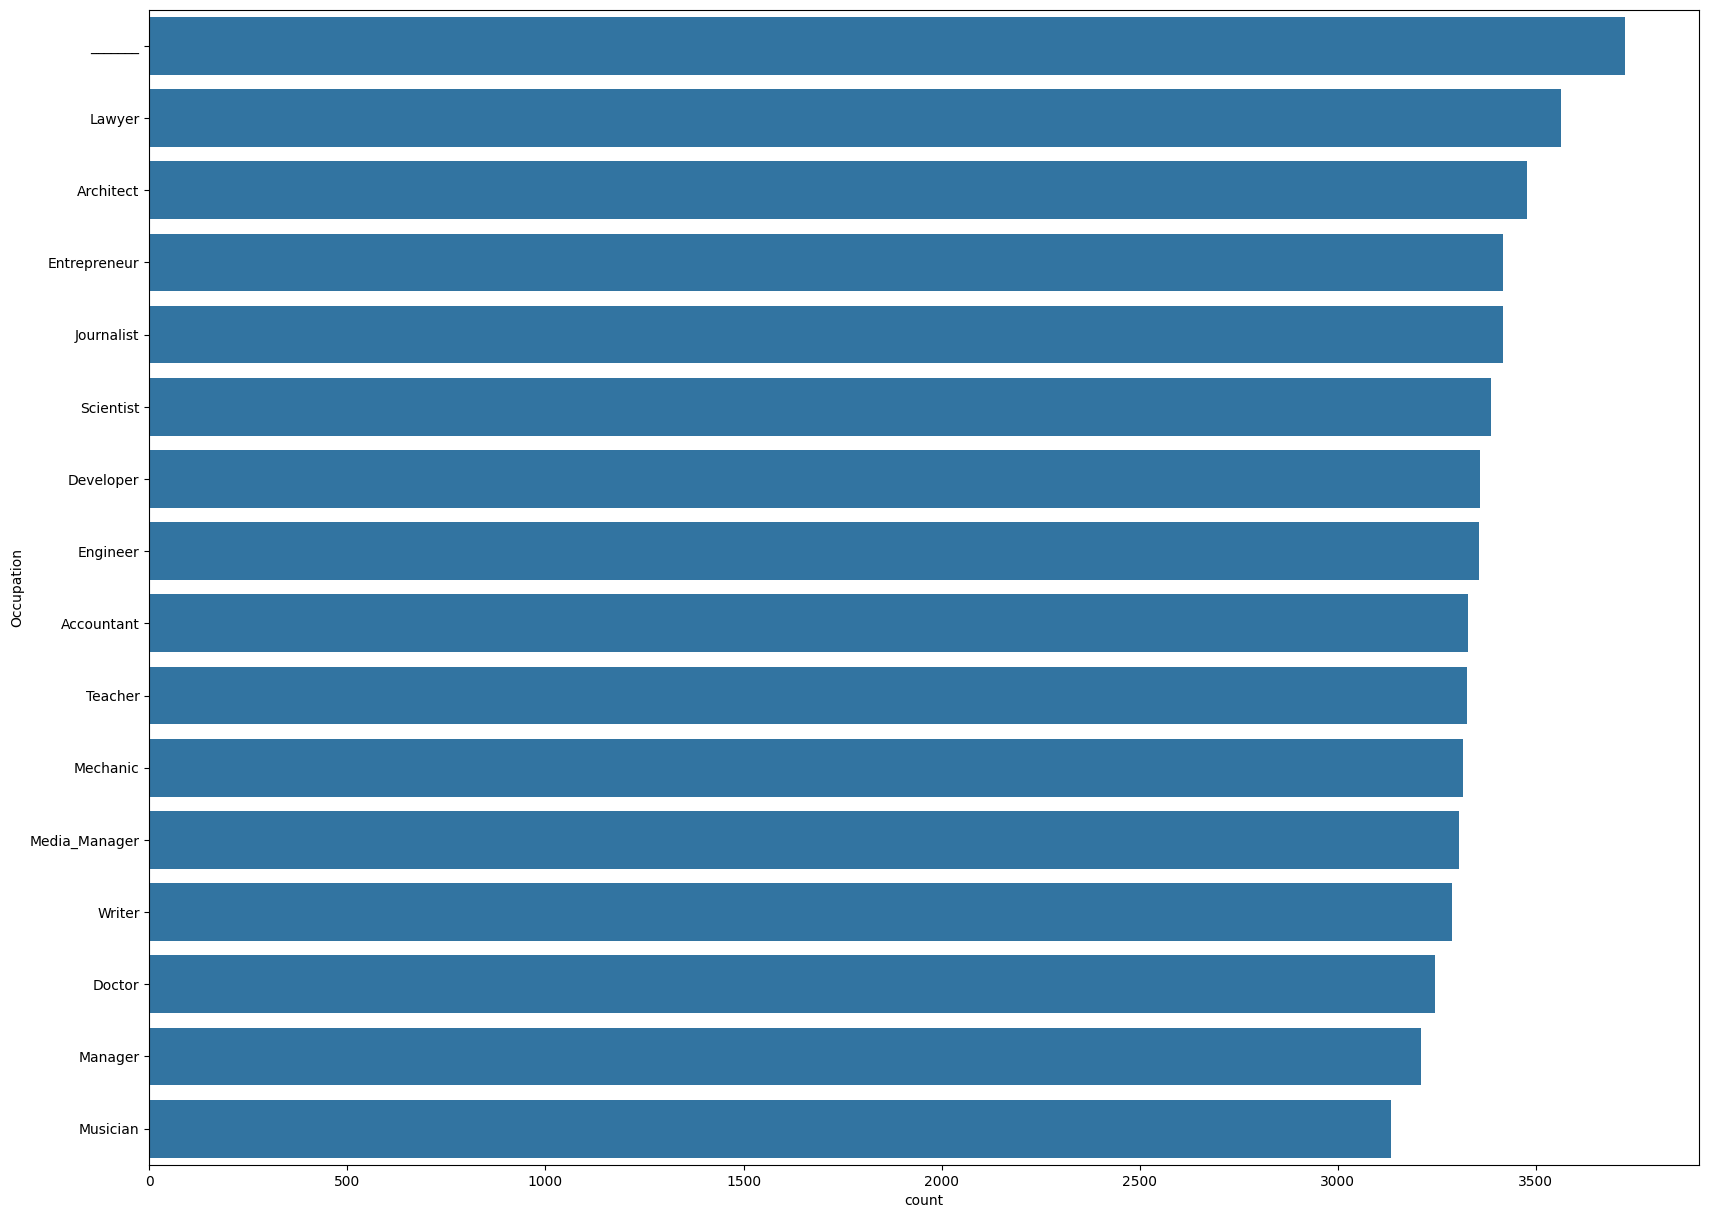

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(y=X_train['Occupation'],order=X_train['Occupation'].value_counts().index)

Inight:
the six greater values in this column are ______ , Lawyer ,Architect, Engineer, Scientist, Mechanic         

### visualize target column

<Axes: xlabel='Credit_Score', ylabel='count'>

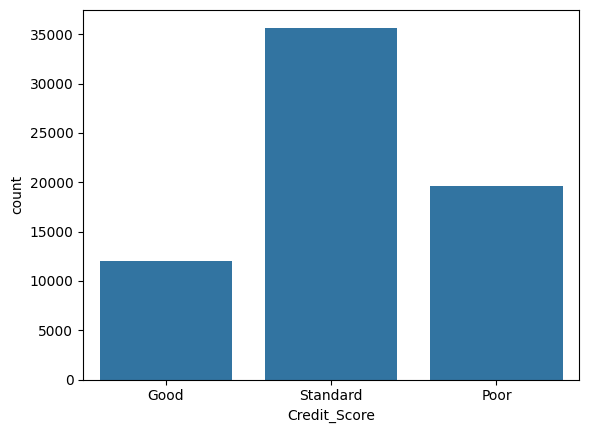

In [ ]:
sns.countplot(x=y)

Insight:
- we have three classes in target column.
- the standard value is the most frequency in Credit_Score.

#### Show the visual of Credit_Mix column

In [ ]:
X_train['Credit_Mix'].unique()

array(['Bad', 'Good', 'Standard', '_'], dtype=object)

<Axes: xlabel='Credit_Mix', ylabel='count'>

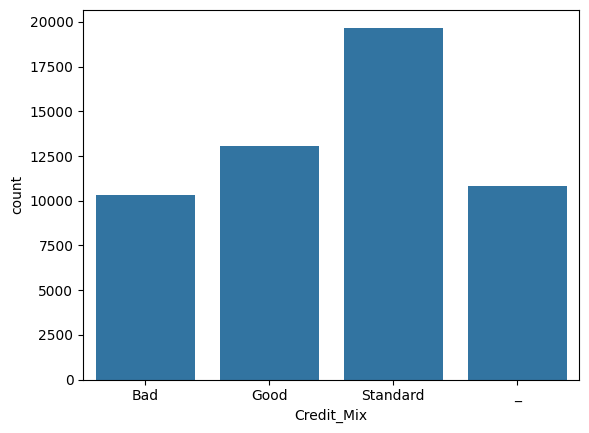

In [ ]:
sns.countplot(x=X_train['Credit_Mix'])

Insight:
- there are four unique value in the Credit_Mix column
- the most frequent one is

In [ ]:
X_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#### show count plot of Payment_of_Min_Amount

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

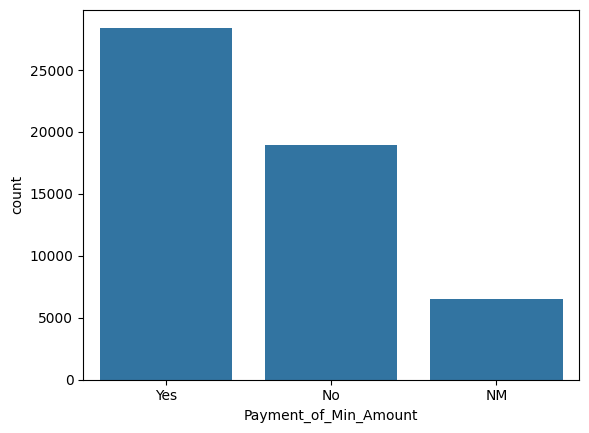

In [ ]:
sns.countplot(x=X_train['Payment_of_Min_Amount'])

##### Insight:

the largest Payment_of_Min_Amount  is yes

#### Show the visual Payment_Behaviour before cleaning

In [ ]:
X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       nan], dtype=object)

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

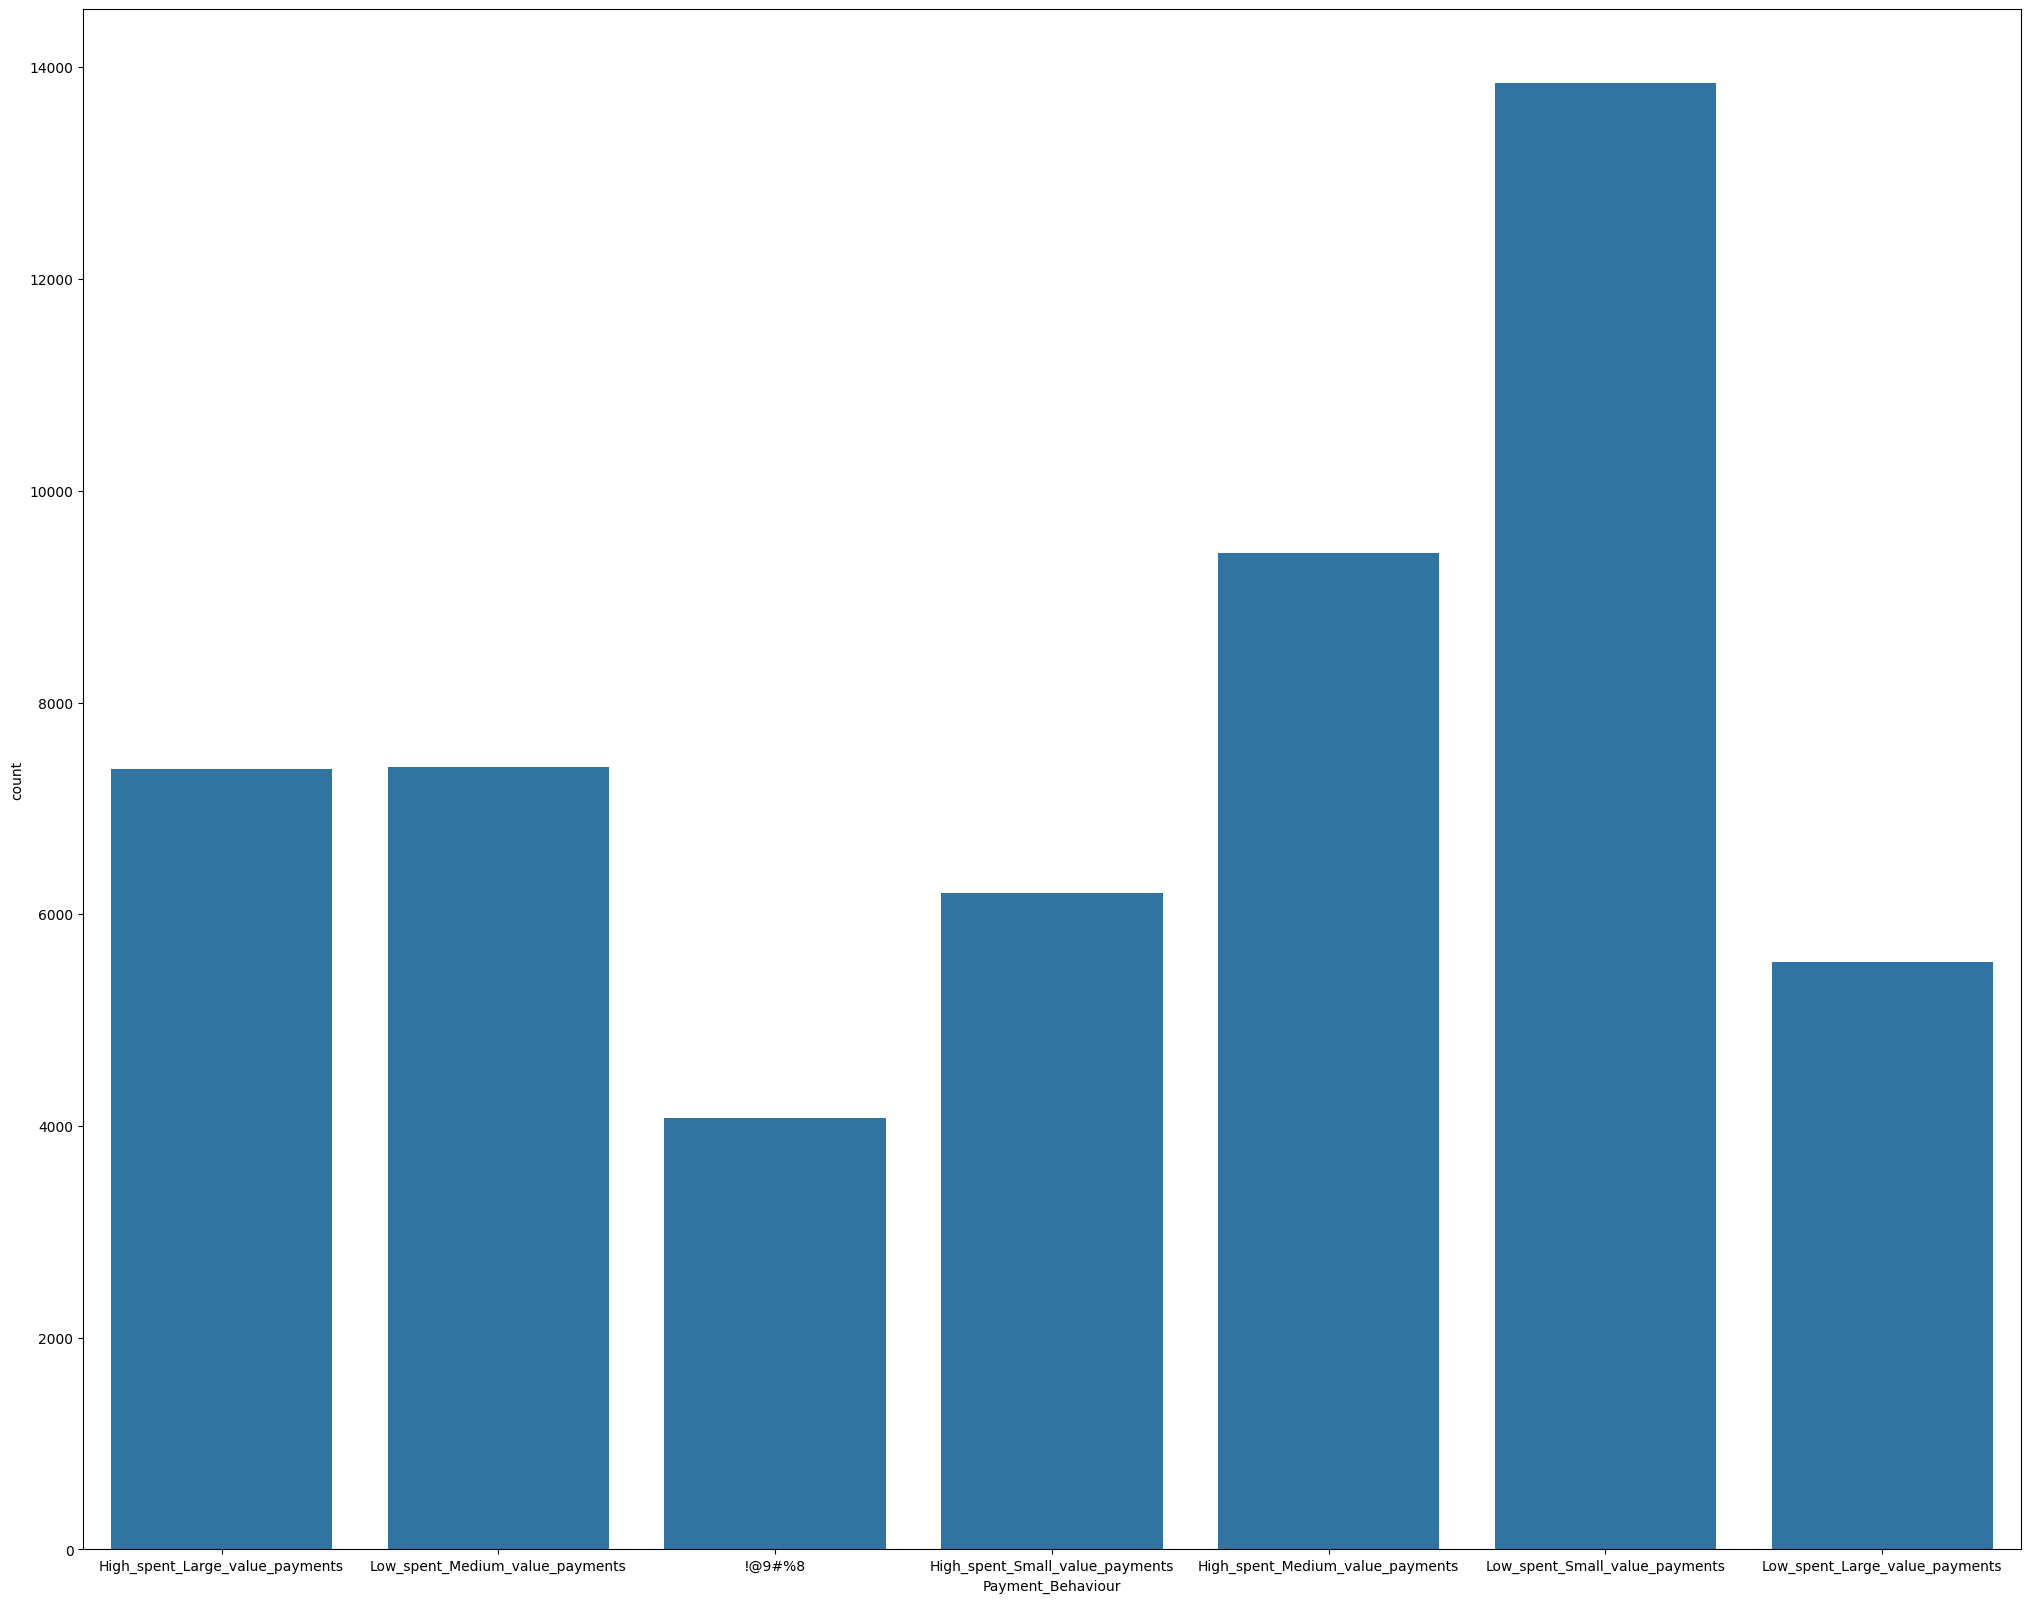

In [ ]:
plt.figure(figsize=(25,20))
sns.countplot(x=X_train['Payment_Behaviour'])

- insight: the largest unique value Low_spent_Small_value_payments ,there is one unique is unknown ('!@9#%8')

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

In [ ]:
X_train.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40248,17,Teacher,59304.2,10,10,24,3,60,24,2.47,12.0,Bad,1945.03,39.966859,12 Years and 5 Months,Yes,76.875282,58.613151939767725,High_spent_Large_value_payments,601.7132328732066
61634,47,Media_Manager,127160.94,4,7,3,2,10,3,3.55,3.0,Good,559.07,29.627763,27 Years and 4 Months,No,136.126761,863.4399577027345,Low_spent_Medium_value_payments,364.50778095684194
62461,34,Entrepreneur,17831.05,6,5,16,3,18,18,16.4,6.0,Standard,1691.54,31.756928,7 Years and 0 Months,Yes,42.793004,78.96196417194348,!@9#%8,306.53711556220935
52376,20,Journalist,63515.92,3,7,3,1,3,0,0.65,4.0,Good,609.25,26.336111,30 Years and 9 Months,No,29.289365,426.61817767005914,Low_spent_Medium_value_payments,380.7917907507354
59061,21,Mechanic,32061.94,4,3,6,0,3,4,2.56,3.0,Good,1443.42,25.859648,21 Years and 4 Months,No,0.000000,57.33471542609442,High_spent_Small_value_payments,440.04811790723886


In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,3746
Changed_Credit_Limit,0


- There ase missing values in Num_of_Delayed_Payment, Num_Credit_Inquiries,Credit_History_Age , Payment_of_Min_Amount, Total_EMI_per_month Amount_invested_monthly	,   Payment_Behaviour , Monthly_Balance

#### Replace unvalid value in column Num_of_Delayed_Payment

In [ ]:
X_train['Num_of_Delayed_Payment'].unique()

array(['24', '3', '18', '0', '4', '12', '14', nan, '8', '15', '23', '17',
       '16', '20', '-1', '11', '21', '7', '6', '10', '5', '13', '19',
       '17_', '25', '22', '9', '1', '26', '21_', '-3', '14_', '11_', '2',
       '12_', '4134', '16_', '22_', '3845', '1699', '4_', '9_', '8_',
       '20_', '18_', '166', '23_', '6_', '25_', '372', '28', '19_', '7_',
       '2461', '851', '-2', '27', '0_', '72', '559', '1996', '15_',
       '4135', '10_', '4249', '13_', '4172', '2255', '1673', '2021',
       '2184', '733', '24_', '1164', '2873', '3_', '1328', '1792', '5_',
       '197', '2793', '3456', '1_', '4096', '707', '2219_', '2521',
       '2645', '3944', '1106', '3051', '2_', '306', '827', '2924', '1867',
       '482', '1338', '265', '3083', '1823', '2351', '640', '3011', '-2_',
       '3340', '2544', '1411', '27_', '1685', '749', '2015', '415',
       '1636', '4075', '2712', '1222', '2243', '2578', '876', '1706',
       '2569', '192', '585', '2672', '2138', '411', '1018', '3819',
    

- There some unvalid data and symbols

In [ ]:
def replace_value(col):

    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

In [ ]:
X_train['Num_of_Delayed_Payment']=replace_value('Num_of_Delayed_Payment')
X_train['Num_of_Delayed_Payment'].unique()

array(['24', '3', '18', '0', '4', '12', '14', 'nan', '8', '15', '23',
       '17', '16', '20', '1', '11', '21', '7', '6', '10', '5', '13', '19',
       '25', '22', '9', '26', '2', '4134', '3845', '1699', '166', '372',
       '28', '2461', '851', '27', '72', '559', '1996', '4135', '4249',
       '4172', '2255', '1673', '2021', '2184', '733', '1164', '2873',
       '1328', '1792', '197', '2793', '3456', '4096', '707', '2219',
       '2521', '2645', '3944', '1106', '3051', '306', '827', '2924',
       '1867', '482', '1338', '265', '3083', '1823', '2351', '640',
       '3011', '3340', '2544', '1411', '1685', '749', '2015', '415',
       '1636', '4075', '2712', '1222', '2243', '2578', '876', '1706',
       '2569', '192', '585', '2672', '2138', '411', '1018', '3819',
       '1953', '4251', '4211', '2149', '3050', '4053', '2413', '2560',
       '1832', '1795', '3529', '1473', '1911', '47', '3245', '4047',
       '2128', '1015', '3881', '538', '4337', '2314', '2323', '3568',
       '3191', '33

#### Replace unvalid value in column  Age

In [ ]:
X_train['Age']=replace_value('Age')
X_train['Age']

,Age
40248,17
61634,47
62461,34
52376,20
59061,21
...,...
55985,38
32399,15
60620,29
34086,24


#### convert Age column into numeric

In [ ]:
X_train['Age']=pd.to_numeric(X_train['Age'],downcast='float')

In [ ]:
X_train['Age'].unique()

array([  17.,   47.,   34.,   20.,   21.,   36.,   55.,   22.,   27.,
         28.,   32.,   37.,   23.,   54.,   45.,   18.,   53.,   24.,
         44.,   31.,   33.,   35.,   25.,   30.,   40., 1402.,   26.,
         29., 2220.,   52.,   38.,   46.,   43.,   14.,  500.,   15.,
       2997.,   39., 3666.,   42.,   16.,   48.,   50., 6426.,   41.,
         49.,   51.,   19.,   56., 7762., 8090., 8525., 7746.,  886.,
       6704., 1095., 4923., 1947., 3629.,  181., 2091., 6124.,  844.,
       6915., 5579., 7806., 6796., 5795., 2546.,  853., 7099., 1734.,
       2733., 7325., 4277., 7377.,  325., 6754., 6098., 6707., 3986.,
       7805., 2024., 5902., 6653., 4679., 7140., 8150.,  742., 2096.,
       7527., 5429., 7438., 6197., 2117., 4897., 4444., 2182., 8037.,
       1220.,  995., 2208., 1692., 1203., 3493., 5032., 6868., 2379.,
       6649., 7456.,  553., 6713., 1083., 7425., 5053., 2864.,  819.,
       6286., 2507., 4580.,  640.,  651., 4542., 4736., 1032., 3888.,
        548., 1366.,

In [ ]:
X_train['Age'].dtype

dtype('float32')

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


### handle unrealistic values

In [ ]:
X_train[X_train['Age'] < 0]['Age'].unique()

array([], dtype=float32)

In [ ]:
X_train[X_train['Age'] >100]['Age'].unique()

array([1402., 2220.,  500., 2997., 3666., 6426., 7762., 8090., 8525.,
       7746.,  886., 6704., 1095., 4923., 1947., 3629.,  181., 2091.,
       6124.,  844., 6915., 5579., 7806., 6796., 5795., 2546.,  853.,
       7099., 1734., 2733., 7325., 4277., 7377.,  325., 6754., 6098.,
       6707., 3986., 7805., 2024., 5902., 6653., 4679., 7140., 8150.,
        742., 2096., 7527., 5429., 7438., 6197., 2117., 4897., 4444.,
       2182., 8037., 1220.,  995., 2208., 1692., 1203., 3493., 5032.,
       6868., 2379., 6649., 7456.,  553., 6713., 1083., 7425., 5053.,
       2864.,  819., 6286., 2507., 4580.,  640.,  651., 4542., 4736.,
       1032., 3888.,  548., 1366., 6660., 1248., 3779., 1364., 6586.,
       5490., 6781., 1094., 1404., 6863., 6794., 7725., 2419., 4857.,
       4202., 8655., 5301., 6463., 1355., 5994., 6799., 5109., 7123.,
       2574., 5788., 2980., 5936.,  573.,  921., 3933., 5626.,  362.,
       6731., 6765., 3145., 6744., 3992., 5008., 2451., 8081., 5221.,
       8296.,  701.,

In [ ]:
print(X_train[X_train['Age'] > 100].shape)

(1490, 20)


In [ ]:
median_age = X_train['Age'].median()
X_train['Age'] = X_train['Age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
# X_train.drop(X_train[X_train['Age'] > 100].index, inplace = True)

In [ ]:
X_train['Age'].unique()

array([17., 47., 34., 20., 21., 36., 55., 22., 27., 28., 32., 37., 23.,
       54., 45., 18., 53., 24., 44., 31., 33., 35., 25., 30., 40., 26.,
       29., 52., 38., 46., 43., 14., 15., 39., 42., 16., 48., 50., 41.,
       49., 51., 19., 56., 99., 95.])

In [ ]:
X_train['Num_Credit_Inquiries'].unique()

array([1.200e+01, 3.000e+00, 6.000e+00, 4.000e+00, 8.000e+00, 5.000e+00,
       1.000e+00, 0.000e+00, 9.000e+00, 7.000e+00, 1.700e+01, 1.500e+01,
       2.000e+00, 1.100e+01, 1.000e+01, 1.400e+01, 1.417e+03, 1.845e+03,
             nan, 1.300e+01, 1.600e+01, 1.829e+03, 2.245e+03, 1.399e+03,
       1.942e+03, 1.632e+03, 2.720e+02, 1.598e+03, 6.020e+02, 7.270e+02,
       1.238e+03, 2.279e+03, 9.100e+02, 1.761e+03, 1.226e+03, 1.004e+03,
       1.582e+03, 1.991e+03, 2.302e+03, 6.620e+02, 1.905e+03, 1.339e+03,
       1.517e+03, 2.332e+03, 1.179e+03, 1.839e+03, 1.584e+03, 1.290e+02,
       2.351e+03, 1.993e+03, 4.430e+02, 4.960e+02, 1.618e+03, 1.600e+02,
       1.573e+03, 6.700e+02, 9.670e+02, 1.132e+03, 4.860e+02, 1.172e+03,
       6.230e+02, 2.196e+03, 5.560e+02, 2.219e+03, 3.280e+02, 1.697e+03,
       1.879e+03, 2.362e+03, 2.730e+02, 8.500e+02, 8.210e+02, 1.330e+02,
       2.254e+03, 1.615e+03, 1.230e+03, 2.340e+02, 2.328e+03, 1.387e+03,
       7.830e+02, 2.405e+03, 2.324e+03, 1.494e+03, 

#### check distribution of Num_Credit_Inquiries to handle missing values

<Axes: xlabel='Num_Credit_Inquiries', ylabel='count'>

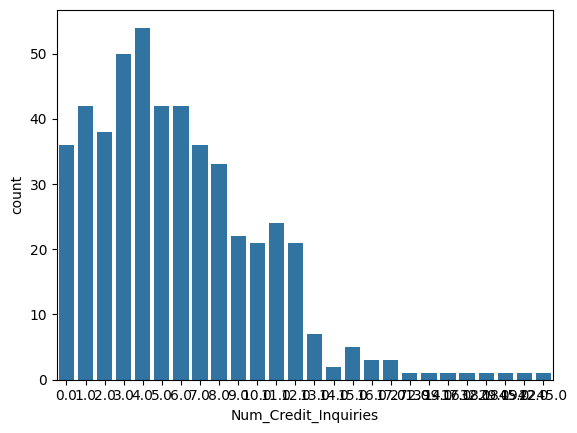

In [ ]:
sns.countplot(x=X_train['Num_Credit_Inquiries'][:500])

In [ ]:
X_train['Num_Credit_Inquiries']=X_train['Num_Credit_Inquiries'].fillna(X_train['Num_Credit_Inquiries'].median())

In [ ]:
X_train['Num_Credit_Inquiries'] = pd.to_numeric(X_train['Num_Credit_Inquiries'], errors='coerce')

In [ ]:
train['Num_Credit_Inquiries'].dtype

dtype('float64')

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Check Credit_History_Age

In [ ]:
X_train['Credit_History_Age'].unique()

array(['12 Years and 5 Months', '27 Years and 4 Months',
       '7 Years and 0 Months', '30 Years and 9 Months',
       '21 Years and 4 Months', '24 Years and 1 Months',
       '15 Years and 6 Months', '19 Years and 6 Months',
       '16 Years and 8 Months', '25 Years and 4 Months',
       '25 Years and 5 Months', '5 Years and 10 Months',
       '11 Years and 8 Months', '11 Years and 6 Months',
       '11 Years and 0 Months', '28 Years and 1 Months',
       '13 Years and 6 Months', '21 Years and 6 Months',
       '20 Years and 7 Months', '8 Years and 4 Months',
       '17 Years and 2 Months', '21 Years and 2 Months',
       '18 Years and 5 Months', '10 Years and 3 Months',
       '6 Years and 1 Months', '26 Years and 9 Months',
       '20 Years and 4 Months', '19 Years and 3 Months',
       '11 Years and 3 Months', '22 Years and 9 Months',
       '29 Years and 0 Months', '13 Years and 9 Months',
       '17 Years and 7 Months', '22 Years and 0 Months',
       '22 Years and 2 Months', '2

#### Convert Credit_History_Age into years and fill missing

In [ ]:
def convert_to_years(value):
    if pd.isna(value):
        return np.nan

    parts = value.split(' ')

    if len(parts) >= 4:
        years = int(parts[0])
        months = int(parts[3])
        total_years = years + (months / 12)
        return round(total_years, 2)
    else:
        return np.nan


In [ ]:
X_train['Credit_History_Age']= X_train['Credit_History_Age'].apply(convert_to_years)

In [ ]:
X_train['Credit_History_Age']=X_train['Credit_History_Age'].fillna(X_train['Credit_History_Age'].median())

In [ ]:
X_train['Credit_History_Age'].unique()

array([12.42, 27.33,  7.  , 30.75, 21.33, 24.08, 15.5 , 19.5 , 16.67,
       25.33, 25.42,  5.83, 11.67, 11.5 , 11.  , 28.08, 13.5 , 21.5 ,
       20.58,  8.33, 17.17, 21.17, 18.42, 10.25,  6.08, 26.75, 20.33,
       19.25, 11.25, 22.75, 29.  , 13.75, 17.58, 22.  , 22.17, 23.33,
       29.92,  6.92, 24.42, 11.92, 18.75, 31.92, 28.25, 19.42, 27.5 ,
       16.42,  6.  , 30.17, 17.42, 29.08, 17.83, 18.25, 15.  ,  1.5 ,
       18.67, 18.33, 12.5 , 14.92,  1.08, 19.33, 22.92, 16.33, 33.  ,
       27.25, 32.  , 29.5 , 19.67, 32.92, 23.5 , 32.83, 19.83,  4.  ,
       25.92, 10.17, 23.25, 15.67, 17.92, 30.33, 26.58, 14.17, 29.17,
       14.42, 20.  , 18.58, 16.17, 28.83, 27.75, 27.92, 32.75, 11.75,
       26.83, 29.75, 23.83, 14.75, 10.67, 23.58,  2.75, 21.25, 15.33,
       14.25, 30.42,  7.33, 18.5 , 16.58, 31.  ,  9.25, 17.25, 30.08,
       26.5 ,  6.25, 10.42, 17.67, 24.  , 12.08, 13.83,  1.75, 23.92,
        9.08, 17.75, 31.67, 20.5 ,  5.92, 26.17, 28.92,  7.17, 24.33,
       22.67, 19.58,

#### Check if any outliers

In [ ]:
X_train[X_train['Credit_History_Age'] >35]['Credit_History_Age'].unique()

array([], dtype=float64)

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### fill missing in Payment_of_Min_Amount it has one null value

In [ ]:
X_train['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM', nan], dtype=object)

In [ ]:
X_train['Payment_of_Min_Amount']=X_train['Payment_of_Min_Amount'].fillna(X_train['Payment_of_Min_Amount'].mode()[0])

#### Encoding Payment_of_Min_Amount

In [ ]:
X_train['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [ ]:
X_train['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,28430
No,18927
NM,6503


In [ ]:
X_train['Payment_of_Min_Amount'] = X_train['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

<ipython-input-65-773cd90443e7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Payment_of_Min_Amount'] = X_train['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:
X_train['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [ ]:
X_train['Payment_of_Min_Amount'].dtype

dtype('int64')

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


In [ ]:
X_train['Total_EMI_per_month']=X_train['Total_EMI_per_month'].fillna(X_train['Total_EMI_per_month'].median())

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Amount_invested_monthly

In [ ]:
X_train['Amount_invested_monthly'].unique()

array(['58.613151939767725', '863.4399577027345', '78.96196417194348',
       ..., '79.37684905451346', '168.51135012674533',
       '142.9688813982085'], dtype=object)

In [ ]:
X_train['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
X_train['Amount_invested_monthly'] = pd.to_numeric(X_train['Amount_invested_monthly'], errors='coerce')

In [ ]:
X_train['Amount_invested_monthly']=X_train['Amount_invested_monthly'].fillna(X_train['Amount_invested_monthly'].median())

In [ ]:
X_train['Amount_invested_monthly'].dtype

dtype('float64')

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Payment_Behaviour

In [ ]:
X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       nan], dtype=object)

In [ ]:
X_train['Payment_Behaviour']=X_train['Payment_Behaviour'].replace('!@9#%8','unknown')

In [ ]:
X_train['Payment_Behaviour']=X_train['Payment_Behaviour'].replace("unknown", X_train['Payment_Behaviour'].mode()[0])

In [ ]:
X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments', nan], dtype=object)

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

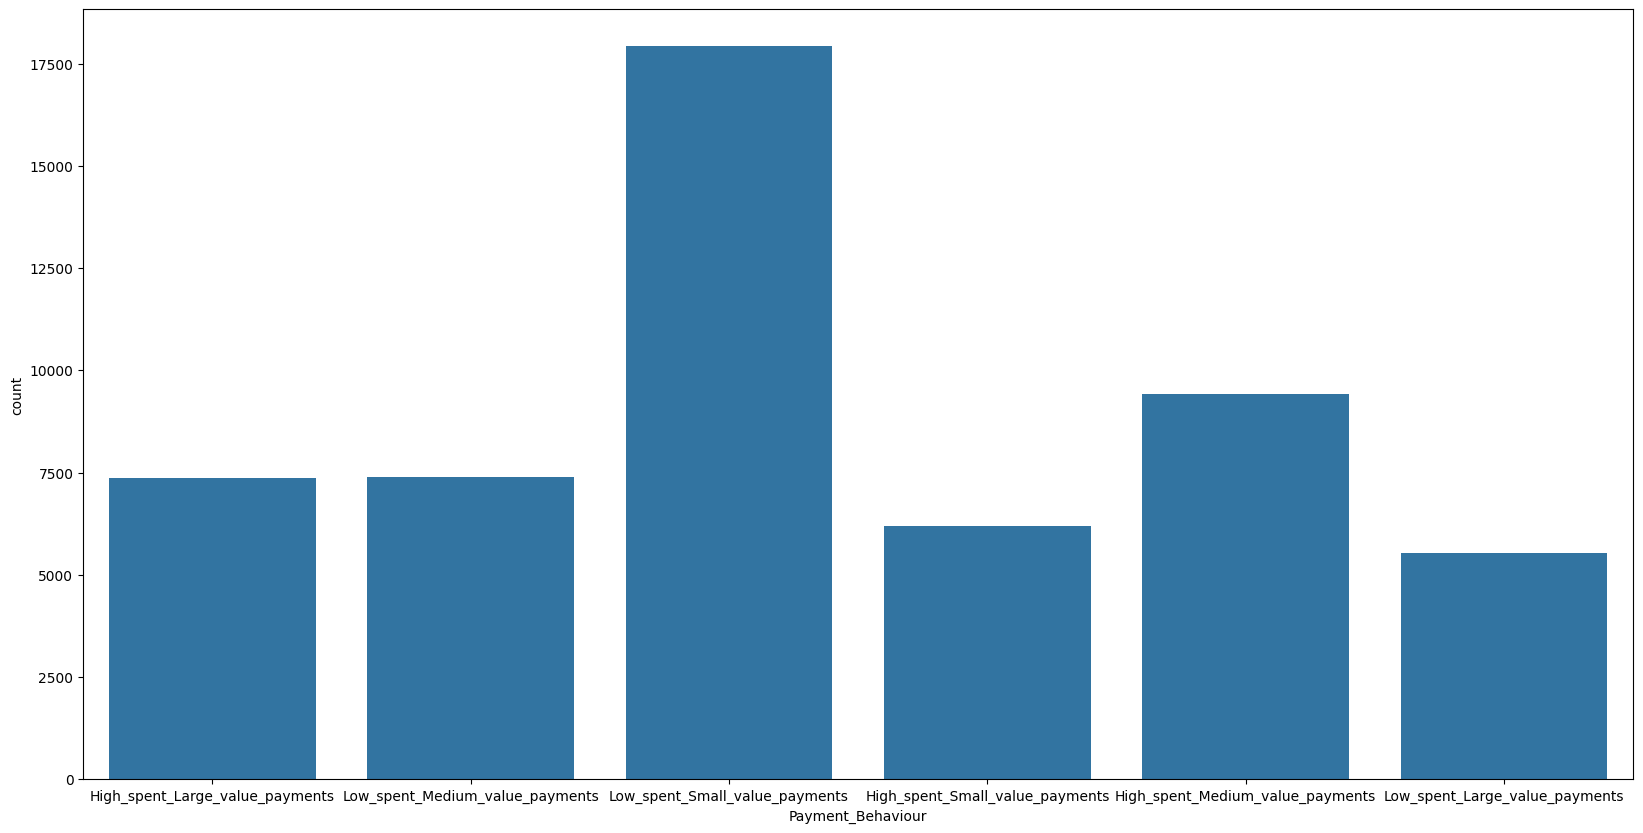

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=X_train['Payment_Behaviour'])

In [ ]:
X_train['Payment_Behaviour']=X_train['Payment_Behaviour'].fillna(X_train['Payment_Behaviour'].mode()[0])

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


##### Encoding Payment_Behaviour

In [ ]:
encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
X_train['Payment_Behaviour'] = encoder_ord.fit_transform(X_train[['Payment_Behaviour']])

In [ ]:
X_train['Payment_Behaviour'].unique()

array([4., 5., 2., 0., 3., 1.])

#### Monthly_Balance column

In [ ]:
X_train['Monthly_Balance'].unique()

array(['601.7132328732066', '364.50778095684194', '306.53711556220935',
       ..., '311.323526278436', '385.05369627150253',
       '304.00568179342656'], dtype=object)

In [ ]:
X_train['Monthly_Balance'].dtype


dtype('O')

In [ ]:
X_train['Monthly_Balance'] = pd.to_numeric(X_train['Monthly_Balance'], errors='coerce')

In [ ]:
X_train['Monthly_Balance'].dtype

dtype('float64')

In [ ]:
X_train['Monthly_Balance']=X_train['Monthly_Balance'].fillna(X_train['Monthly_Balance'].median())

In [ ]:
X_train.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


### 💡 Now , No miising values

In [ ]:
X_train.dtypes

,0
Age,float64
Occupation,object
Annual_Income,object
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,object


#### Occupation

In [ ]:
X_train['Occupation'].unique()

array(['Teacher', 'Media_Manager', 'Entrepreneur', 'Journalist',
       'Mechanic', 'Writer', 'Scientist', 'Doctor', 'Musician',
       'Engineer', 'Accountant', 'Lawyer', 'Developer', '_______',
       'Architect', 'Manager'], dtype=object)

In [ ]:
X_train['Occupation'] = X_train['Occupation'].replace("_______", "Unknown")

In [ ]:
X_train['Occupation'].unique()

array(['Teacher', 'Media_Manager', 'Entrepreneur', 'Journalist',
       'Mechanic', 'Writer', 'Scientist', 'Doctor', 'Musician',
       'Engineer', 'Accountant', 'Lawyer', 'Developer', 'Unknown',
       'Architect', 'Manager'], dtype=object)

<ipython-input-96-982bfad768c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train['Occupation'],palette="coolwarm")


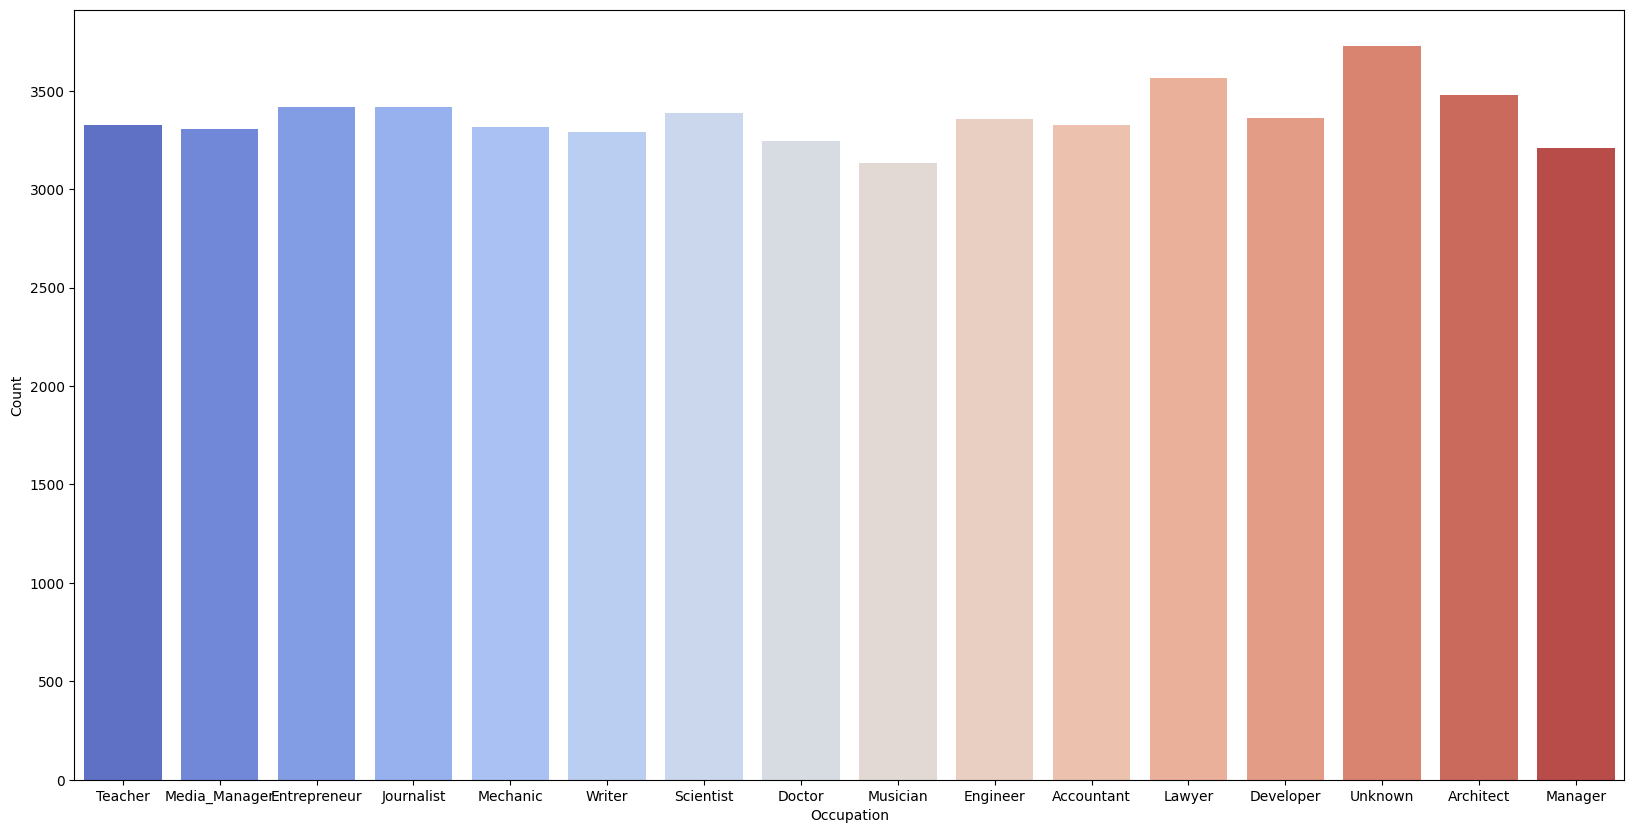

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=X_train['Occupation'],palette="coolwarm")

plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

#### occupation_encoded

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train['Occupation'] = X_train['Occupation'].astype(str)
occupation_encoded = encoder.fit_transform(X_train[['Occupation']])


In [ ]:
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))
occupation_encoded_df.index = X_train.index
X_train = pd.concat([X_train, occupation_encoded_df], axis=1)
X_train.drop('Occupation', axis=1, inplace=True)

X_train.head()


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
40248,17.0,59304.2,10,10,24,3,60,24,2.47,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61634,47.0,127160.94,4,7,3,2,10,3,3.55,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62461,34.0,17831.05,6,5,16,3,18,18,16.4,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52376,20.0,63515.92,3,7,3,1,3,0,0.65,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59061,21.0,32061.94,4,3,6,0,3,4,2.56,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Handle Annual_Income

In [ ]:
X_train['Annual_Income'].unique()

array(['59304.2', '127160.94', '17831.05', ..., '17711146.0_',
       '34847.84_', '18822.02_'], dtype=object)

In [ ]:
X_train['Annual_Income']=replace_value('Annual_Income')
X_train['Annual_Income']

,Annual_Income
40248,59304.2
61634,127160.94
62461,17831.05
52376,63515.92
59061,32061.94
...,...
55985,10917.655
32399,54832.83
60620,17642.275
34086,45499.89


#### Annual_Income

In [ ]:
X_train['Annual_Income']=pd.to_numeric(X_train['Annual_Income'],downcast='float')

In [ ]:
X_train.dtypes

,0
Age,float64
Annual_Income,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,object
Num_Credit_Inquiries,float64


In [ ]:
X_train['Num_of_Loan'].unique()

array(['3', '2', '1', '0', '5', '4', '6', '7', '9', '-100', '8', '3_',
       '2_', '983', '0_', '9_', '1447', '6_', '8_', '1_', '1017', '7_',
       '5_', '4_', '1412', '193', '999', '579', '881', '1129_', '430',
       '1312', '1241', '1384', '157', '868', '1474', '449', '848', '365',
       '699', '696', '284', '1464', '1023', '1209', '359', '302', '640',
       '1444', '288', '1015', '1363', '19', '1461', '243', '1217', '1187',
       '501', '633', '405', '898', '945', '1088', '1313', '341', '614',
       '855', '1484', '1228', '935', '955', '252', '101', '617', '95',
       '1151', '23', '416', '679', '781', '910', '701', '1482', '444',
       '100', '251', '1329', '745', '757', '1406', '1185_', '601', '1181',
       '1463', '186', '716', '719', '581', '238', '931', '1495', '1369',
       '141', '282', '404', '351', '424', '1318', '661', '629', '123',
       '494', '1070', '1214', '1035', '89', '285', '1150', '1424', '241',
       '1014', '1152', '217', '1222', '143_', '387', '119

In [ ]:
X_train['Num_of_Loan']=replace_value('Num_of_Loan')

In [ ]:
X_train['Num_of_Loan']=pd.to_numeric(X_train['Num_of_Loan'],downcast='float')

In [ ]:
X_train['Num_of_Loan'].unique()

array([3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 5.000e+00, 4.000e+00,
       6.000e+00, 7.000e+00, 9.000e+00, 1.000e+02, 8.000e+00, 9.830e+02,
       1.447e+03, 1.017e+03, 1.412e+03, 1.930e+02, 9.990e+02, 5.790e+02,
       8.810e+02, 1.129e+03, 4.300e+02, 1.312e+03, 1.241e+03, 1.384e+03,
       1.570e+02, 8.680e+02, 1.474e+03, 4.490e+02, 8.480e+02, 3.650e+02,
       6.990e+02, 6.960e+02, 2.840e+02, 1.464e+03, 1.023e+03, 1.209e+03,
       3.590e+02, 3.020e+02, 6.400e+02, 1.444e+03, 2.880e+02, 1.015e+03,
       1.363e+03, 1.900e+01, 1.461e+03, 2.430e+02, 1.217e+03, 1.187e+03,
       5.010e+02, 6.330e+02, 4.050e+02, 8.980e+02, 9.450e+02, 1.088e+03,
       1.313e+03, 3.410e+02, 6.140e+02, 8.550e+02, 1.484e+03, 1.228e+03,
       9.350e+02, 9.550e+02, 2.520e+02, 1.010e+02, 6.170e+02, 9.500e+01,
       1.151e+03, 2.300e+01, 4.160e+02, 6.790e+02, 7.810e+02, 9.100e+02,
       7.010e+02, 1.482e+03, 4.440e+02, 2.510e+02, 1.329e+03, 7.450e+02,
       7.570e+02, 1.406e+03, 1.185e+03, 6.010e+02, 

In [ ]:
X_train.dtypes

,0
Age,float64
Annual_Income,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float32
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,object
Num_Credit_Inquiries,float64


#### Num_of_Delayed_Payment

In [ ]:
X_train['Num_of_Delayed_Payment'].unique()

array(['24', '3', '18', '0', '4', '12', '14', 'nan', '8', '15', '23',
       '17', '16', '20', '1', '11', '21', '7', '6', '10', '5', '13', '19',
       '25', '22', '9', '26', '2', '4134', '3845', '1699', '166', '372',
       '28', '2461', '851', '27', '72', '559', '1996', '4135', '4249',
       '4172', '2255', '1673', '2021', '2184', '733', '1164', '2873',
       '1328', '1792', '197', '2793', '3456', '4096', '707', '2219',
       '2521', '2645', '3944', '1106', '3051', '306', '827', '2924',
       '1867', '482', '1338', '265', '3083', '1823', '2351', '640',
       '3011', '3340', '2544', '1411', '1685', '749', '2015', '415',
       '1636', '4075', '2712', '1222', '2243', '2578', '876', '1706',
       '2569', '192', '585', '2672', '2138', '411', '1018', '3819',
       '1953', '4251', '4211', '2149', '3050', '4053', '2413', '2560',
       '1832', '1795', '3529', '1473', '1911', '47', '3245', '4047',
       '2128', '1015', '3881', '538', '4337', '2314', '2323', '3568',
       '3191', '33

In [ ]:
X_train['Num_of_Delayed_Payment']=X_train['Num_of_Delayed_Payment'].replace('nan',X_train['Monthly_Balance'].median())

In [ ]:
X_train['Num_of_Delayed_Payment'].unique()

array(['24', '3', '18', '0', '4', '12', '14', 335.9970999568438, '8',
       '15', '23', '17', '16', '20', '1', '11', '21', '7', '6', '10', '5',
       '13', '19', '25', '22', '9', '26', '2', '4134', '3845', '1699',
       '166', '372', '28', '2461', '851', '27', '72', '559', '1996',
       '4135', '4249', '4172', '2255', '1673', '2021', '2184', '733',
       '1164', '2873', '1328', '1792', '197', '2793', '3456', '4096',
       '707', '2219', '2521', '2645', '3944', '1106', '3051', '306',
       '827', '2924', '1867', '482', '1338', '265', '3083', '1823',
       '2351', '640', '3011', '3340', '2544', '1411', '1685', '749',
       '2015', '415', '1636', '4075', '2712', '1222', '2243', '2578',
       '876', '1706', '2569', '192', '585', '2672', '2138', '411', '1018',
       '3819', '1953', '4251', '4211', '2149', '3050', '4053', '2413',
       '2560', '1832', '1795', '3529', '1473', '1911', '47', '3245',
       '4047', '2128', '1015', '3881', '538', '4337', '2314', '2323',
       '3568',

In [ ]:
X_train['Num_of_Delayed_Payment	']=pd.to_numeric(X_train['Num_of_Delayed_Payment'],downcast='float')

In [ ]:
X_train['Num_of_Delayed_Payment'].unique()

array(['24', '3', '18', '0', '4', '12', '14', 335.9970999568438, '8',
       '15', '23', '17', '16', '20', '1', '11', '21', '7', '6', '10', '5',
       '13', '19', '25', '22', '9', '26', '2', '4134', '3845', '1699',
       '166', '372', '28', '2461', '851', '27', '72', '559', '1996',
       '4135', '4249', '4172', '2255', '1673', '2021', '2184', '733',
       '1164', '2873', '1328', '1792', '197', '2793', '3456', '4096',
       '707', '2219', '2521', '2645', '3944', '1106', '3051', '306',
       '827', '2924', '1867', '482', '1338', '265', '3083', '1823',
       '2351', '640', '3011', '3340', '2544', '1411', '1685', '749',
       '2015', '415', '1636', '4075', '2712', '1222', '2243', '2578',
       '876', '1706', '2569', '192', '585', '2672', '2138', '411', '1018',
       '3819', '1953', '4251', '4211', '2149', '3050', '4053', '2413',
       '2560', '1832', '1795', '3529', '1473', '1911', '47', '3245',
       '4047', '2128', '1015', '3881', '538', '4337', '2314', '2323',
       '3568',

In [ ]:
X_train.dtypes

,0
Age,float64
Annual_Income,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float32
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,object
Num_Credit_Inquiries,float64


#### convert data type Changed_Credit_Limit

In [ ]:
X_train['Changed_Credit_Limit'].unique()

array(['2.47', '3.55', '16.4', ..., '30.69', '13.670000000000002',
       '-0.44'], dtype=object)

In [ ]:
X_train['Changed_Credit_Limit'] = pd.to_numeric(X_train['Changed_Credit_Limit'], errors='coerce')

In [ ]:
X_train.dtypes

,0
Age,float64
Annual_Income,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float32
Delay_from_due_date,int64
Num_of_Delayed_Payment,object
Changed_Credit_Limit,float64
Num_Credit_Inquiries,float64


#### Outstanding_Debt

In [ ]:
X_train['Outstanding_Debt'] = X_train['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
X_train['Outstanding_Debt'] = pd.to_numeric(X_train['Outstanding_Debt'], errors='coerce')

#### Credit_Mix

In [ ]:
X_train['Credit_Mix'].unique()

array(['Bad', 'Good', 'Standard', '_'], dtype=object)

In [ ]:
mode_value = X_train['Credit_Mix'].mode()[0]
X_train['Credit_Mix']=X_train['Credit_Mix'].replace("_", mode_value)

In [ ]:
X_train['Credit_Mix']

,Credit_Mix
40248,Bad
61634,Good
62461,Standard
52376,Good
59061,Good
...,...
55985,Standard
32399,Standard
60620,Good
34086,Bad


In [ ]:
encoder_ord_mix = OrdinalEncoder(categories=[['Bad', 'Good', 'Standard']])

In [ ]:
X_train['Credit_Mix'] = encoder_ord_mix.fit_transform(X_train[['Credit_Mix']])

In [ ]:
X_train['Credit_Mix']

,Credit_Mix
40248,0.0
61634,1.0
62461,2.0
52376,1.0
59061,1.0
...,...
55985,2.0
32399,2.0
60620,1.0
34086,0.0


## Credit_Score Column (the target)

In [ ]:
y_train.unique()

array(['Poor', 'Good', 'Standard', nan], dtype=object)

In [ ]:

y_train=y_train.replace(np.nan, y_train.mode()[0])

In [ ]:
y_train.unique()

array(['Poor', 'Good', 'Standard'], dtype=object)

In [ ]:
score_encoder = LabelEncoder()

y_encoded = score_encoder.fit_transform(y_train)



In [ ]:
y_encoded

array([1, 0, 1, ..., 1, 2, 2])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53860 entries, 40248 to 58067
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       53860 non-null  float64
 1   Annual_Income             53860 non-null  float64
 2   Num_Bank_Accounts         53860 non-null  int64  
 3   Num_Credit_Card           53860 non-null  int64  
 4   Interest_Rate             53860 non-null  int64  
 5   Num_of_Loan               53860 non-null  float32
 6   Delay_from_due_date       53860 non-null  int64  
 7   Num_of_Delayed_Payment    53860 non-null  object 
 8   Changed_Credit_Limit      52703 non-null  float64
 9   Num_Credit_Inquiries      53860 non-null  float64
 10  Credit_Mix                53860 non-null  float64
 11  Outstanding_Debt          53860 non-null  float64
 12  Credit_Utilization_Ratio  53860 non-null  float64
 13  Credit_History_Age        53860 non-null  float64
 14  Payment

##💡 Finally ,all columns in data (X_train) is good

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

### Scaling

In [ ]:
# scaler =StandardScaler()
scaler=RobustScaler()
scaled_data=scaler.fit_transform(X_train)
scaled_data

array([[-1.        ,  0.41174662,  1.        , ...,  0.        ,
         0.        ,  0.9       ],
       [ 0.875     ,  1.69228197, -0.5       , ...,  0.        ,
         0.        , -1.2       ],
       [ 0.0625    , -0.3708998 ,  0.        , ...,  0.        ,
         0.        ,  0.3       ],
       ...,
       [-0.25      , -0.37446221, -1.5       , ...,  0.        ,
         0.        , -0.6       ],
       [-0.5625    ,  0.15124328,  0.5       , ...,  0.        ,
         0.        ,  0.1       ],
       [ 0.6875    , -0.38098767, -1.25      , ...,  0.        ,
         0.        , -1.2       ]])

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [ ]:
len(y_encoded)

53860

In [ ]:
len(y_train)

53860

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=1234)
model.fit(scaled_data, y_encoded)

DecisionTreeClassifier(max_depth=3, random_state=1234)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

## Xvalid

In [ ]:
X_valid=X_valid.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan','Monthly_Inhand_Salary'], axis = 1)

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,620
Changed_Credit_Limit,0


#### Replace unvalid value in column Num_of_Delayed_Payment

In [ ]:
X_valid['Num_of_Delayed_Payment'].unique()

array(['14', '2', '21', '17', '6', '15', '11', '9', '20', '16', '19', '8',
       '13', '12', '24', '18', nan, '22', '7', '3', '10', '23', '25',
       '8_', '0', '-2', '4', '1', '5', '23_', '10_', '28', '15_', '12_',
       '-1', '2237_', '13_', '20_', '27', '468', '2_', '7_', '26', '3858',
       '24_', '4042', '22_', '19_', '1941', '2044', '18_', '9_', '17_',
       '16_', '21_', '4_', '25_', '-3', '3251', '758_', '14_', '11_',
       '2569_', '3103', '3_', '1337', '4043', '5_', '4139', '6_', '4022',
       '1014', '2616', '508', '1060', '851', '121', '1841', '4397',
       '3097_', '1867', '2008', '1481', '1732', '3621', '0_', '3840_',
       '2250', '3489', '3738', '2503', '3478', '497', '700', '4384',
       '1489', '972', '3050', '-1_', '594', '52', '663_', '829', '847',
       '28_', '1989', '2450', '2707', '2959', '27_', '1079', '1946', '1_',
       '808', '2694', '4164', '2812', '2810', '1192', '1859', '2204',
       '4270', '1647', '1282', '-2_', '3316', '3632'], dtype=objec

In [ ]:
def replace_value(col):

    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

In [ ]:
X_valid['Num_of_Delayed_Payment']=replace_value('Num_of_Delayed_Payment')
X_valid['Num_of_Delayed_Payment'].unique()

array(['14', '2', '21', '17', '6', '15', '11', '9', '20', '16', '19', '8',
       '13', '12', '24', '18', 'nan', '22', '7', '3', '10', '23', '25',
       '0', '4', '1', '5', '28', '2237', '27', '468', '26', '3858',
       '4042', '1941', '2044', '3251', '758', '2569', '3103', '1337',
       '4043', '4139', '4022', '1014', '2616', '508', '1060', '851',
       '121', '1841', '4397', '3097', '1867', '2008', '1481', '1732',
       '3621', '3840', '2250', '3489', '3738', '2503', '3478', '497',
       '700', '4384', '1489', '972', '3050', '594', '52', '663', '829',
       '847', '1989', '2450', '2707', '2959', '1079', '1946', '808',
       '2694', '4164', '2812', '2810', '1192', '1859', '2204', '4270',
       '1647', '1282', '3316', '3632'], dtype=object)

#### Replace unvalid value in column  Age

In [ ]:
X_valid['Age']=replace_value('Age')
X_valid['Age']

,Age
45943,55
8772,34
46766,45
6069,30
65769,19
...,...
9450,37
29260,40
14453,27
12030,493


#### convert Age column into numeric

In [ ]:
X_valid['Age']=pd.to_numeric(X_valid['Age'],downcast='float')

In [ ]:
X_valid['Age'].unique()

array([  55.,   34.,   45.,   30.,   19.,   24.,   52.,   38., 6015.,
         28.,   32.,   39.,   37.,   27.,   26.,   21.,   17.,   41.,
         33.,   25.,   23.,   42.,   20.,   35.,   18.,   51.,   22.,
         15.,   29.,   47.,   49.,   43., 7316.,   36.,   14.,   54.,
         56., 5376., 6674.,   44., 7715.,   16.,   53.,   31.,   40.,
         48.,   50.,   46.,  381.,  500.,  846., 6036., 3854., 2987.,
       7330.,  609., 7166., 6501., 7750., 3285., 5781., 2858., 2933.,
       5851., 6360., 3458., 5976., 2843., 5504., 7651., 8234., 3853.,
       8043., 5741., 4213., 5749., 2077., 2939., 3715., 8291.,  305.,
       8352., 6365., 4034.,  169., 2352., 5287., 1496., 5001.,  203.,
       2400., 3665.,  102., 1565., 6006., 7131., 6141., 8639., 5782.,
       6892., 5995.,  221., 3169.,  963., 4416., 4946., 6321., 2451.,
       2027., 4655., 7453., 1176.,  715., 1424.,  576., 1792., 4682.,
       5696., 8228., 7206., 7178., 7480., 4298.,  836., 3085., 5203.,
       8503., 5377.,

In [ ]:
X_valid['Age'].dtype

dtype('float32')

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


### handle unrealistic values

In [ ]:
X_valid[X_valid['Age'] < 0]['Age'].unique()

array([], dtype=float32)

In [ ]:
X_valid[X_valid['Age'] >100]['Age'].unique()

array([6015., 7316., 5376., 6674., 7715.,  381.,  500.,  846., 6036.,
       3854., 2987., 7330.,  609., 7166., 6501., 7750., 3285., 5781.,
       2858., 2933., 5851., 6360., 3458., 5976., 2843., 5504., 7651.,
       8234., 3853., 8043., 5741., 4213., 5749., 2077., 2939., 3715.,
       8291.,  305., 8352., 6365., 4034.,  169., 2352., 5287., 1496.,
       5001.,  203., 2400., 3665.,  102., 1565., 6006., 7131., 6141.,
       8639., 5782., 6892., 5995.,  221., 3169.,  963., 4416., 4946.,
       6321., 2451., 2027., 4655., 7453., 1176.,  715., 1424.,  576.,
       1792., 4682., 5696., 8228., 7206., 7178., 7480., 4298.,  836.,
       3085., 5203., 8503., 5377.,  814., 5959., 5649., 4847., 6288.,
       4958., 4459., 5657., 7894.,  956., 5342., 1971.,  924., 8669.,
       8250.,  356.,  634., 6510.,  349., 8421., 6608.,  287., 3638.,
       7315.,  623., 3197., 1335., 4710., 6283., 5589., 8155., 1808.,
       2713., 5425., 7657., 7066., 1206., 6895., 3542., 3205., 8505.,
       4782., 8562.,

In [ ]:
print(X_valid[X_valid['Age'] > 100].shape)

(252, 20)


In [ ]:
median_age = X_valid['Age'].median()
X_valid['Age'] = X_valid['Age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
X_valid['Age'].unique()

array([55., 34., 45., 30., 19., 24., 52., 38., 33., 28., 32., 39., 37.,
       27., 26., 21., 17., 41., 25., 23., 42., 20., 35., 18., 51., 22.,
       15., 29., 47., 49., 43., 36., 14., 54., 56., 44., 16., 53., 31.,
       40., 48., 50., 46.])

### Num_Credit_Inquiries

In [ ]:
X_valid['Num_Credit_Inquiries'].unique()

array([0.000e+00, 4.000e+00, 9.000e+00, 2.000e+00, 6.000e+00, 1.100e+01,
       3.000e+00,       nan, 1.200e+01, 8.000e+00, 1.300e+01, 1.000e+01,
       5.000e+00, 7.000e+00, 9.820e+02, 1.500e+01, 1.600e+01, 1.000e+00,
       1.244e+03, 1.400e+01, 1.450e+03, 2.540e+03, 1.338e+03, 6.300e+02,
       1.700e+01, 5.700e+01, 2.323e+03, 2.167e+03, 1.307e+03, 3.040e+02,
       2.480e+03, 6.050e+02, 6.600e+01, 2.219e+03, 1.748e+03, 5.830e+02,
       1.312e+03, 4.600e+02, 4.220e+02, 5.760e+02, 1.132e+03, 6.570e+02,
       6.100e+01, 6.990e+02, 1.402e+03, 4.920e+02, 5.300e+02, 1.175e+03,
       1.950e+03, 2.363e+03, 3.330e+02, 8.370e+02, 6.540e+02, 2.588e+03,
       2.112e+03, 7.250e+02, 1.286e+03, 4.500e+02, 2.453e+03, 1.951e+03,
       2.520e+02, 4.550e+02, 1.710e+02, 2.118e+03, 1.217e+03, 2.494e+03,
       2.150e+03, 2.563e+03, 1.395e+03, 1.787e+03, 1.203e+03, 1.283e+03,
       4.730e+02, 1.908e+03, 2.131e+03, 7.950e+02, 1.247e+03, 1.985e+03,
       5.300e+01, 5.860e+02, 1.545e+03, 5.250e+02, 

In [ ]:
X_valid['Num_Credit_Inquiries']=X_valid['Num_Credit_Inquiries'].fillna(X_valid['Num_Credit_Inquiries'].median())

In [ ]:
X_valid['Num_Credit_Inquiries'] = pd.to_numeric(X_valid['Num_Credit_Inquiries'], errors='coerce')

In [ ]:
X_valid['Num_Credit_Inquiries'].dtype

dtype('float64')

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Check Credit_History_Age

In [ ]:
X_valid['Credit_History_Age'].unique()

array([nan, '30 Years and 2 Months', '2 Years and 7 Months',
       '25 Years and 2 Months', '17 Years and 9 Months',
       '10 Years and 2 Months', '26 Years and 11 Months',
       '12 Years and 1 Months', '22 Years and 5 Months',
       '14 Years and 10 Months', '6 Years and 2 Months',
       '16 Years and 6 Months', '12 Years and 5 Months',
       '22 Years and 11 Months', '11 Years and 0 Months',
       '11 Years and 11 Months', '26 Years and 8 Months',
       '19 Years and 2 Months', '10 Years and 11 Months',
       '16 Years and 11 Months', '21 Years and 5 Months',
       '30 Years and 9 Months', '16 Years and 3 Months',
       '32 Years and 11 Months', '5 Years and 10 Months',
       '21 Years and 4 Months', '18 Years and 3 Months',
       '11 Years and 10 Months', '17 Years and 0 Months',
       '23 Years and 1 Months', '19 Years and 4 Months',
       '9 Years and 11 Months', '10 Years and 4 Months',
       '29 Years and 1 Months', '8 Years and 11 Months',
       '23 Years and

#### Convert Credit_History_Age into years and fill missing

In [ ]:
def convert_to_years(value):
    if pd.isna(value):
        return np.nan

    parts = value.split(' ')

    if len(parts) >= 4:
        years = int(parts[0])
        months = int(parts[3])
        total_years = years + (months / 12)
        return round(total_years, 2)
    else:
        return np.nan


In [ ]:
X_valid['Credit_History_Age']= X_valid['Credit_History_Age'].apply(convert_to_years)

In [ ]:
X_valid['Credit_History_Age']=X_valid['Credit_History_Age'].fillna(X_valid['Credit_History_Age'].median())

In [ ]:
X_valid['Credit_History_Age'].unique()

array([18.25, 30.17,  2.58, 25.17, 17.75, 10.17, 26.92, 12.08, 22.42,
       14.83,  6.17, 16.5 , 12.42, 22.92, 11.  , 11.92, 26.67, 19.17,
       10.92, 16.92, 21.42, 30.75, 16.25, 32.92,  5.83, 21.33, 11.83,
       17.  , 23.08, 19.33,  9.92, 10.33, 29.08,  8.92, 23.58,  8.58,
        7.58, 18.83, 20.58, 11.08, 17.5 , 15.17, 22.67, 23.17, 32.25,
       21.92, 12.33, 24.33, 27.83, 17.42,  6.25,  8.  , 33.33, 16.83,
       14.25, 17.67, 27.08, 18.  , 19.5 , 26.58, 16.75, 16.08,  5.5 ,
       15.83,  8.33, 29.17, 10.08,  7.08, 33.  , 28.58, 25.08, 17.08,
       22.58, 30.83, 16.67,  8.08, 16.17, 29.5 , 22.83,  7.67, 25.33,
       21.67, 14.75, 25.92, 22.17, 32.17, 19.25, 30.92,  9.42, 13.42,
       28.42, 20.08,  3.08, 19.58, 32.83, 19.  ,  0.75, 10.  , 25.58,
        9.67, 11.75, 27.  , 14.92, 27.42, 23.83,  7.25,  1.92,  3.75,
       14.  , 30.42, 19.92, 19.42, 12.75, 29.75, 15.42, 17.92, 27.33,
       15.33, 31.67, 26.25,  7.17, 24.  , 13.75, 23.92, 30.25, 18.42,
        9.83, 14.42,

#### Check if any outliers

In [ ]:
X_valid[X_valid['Credit_History_Age'] >35]['Credit_History_Age'].unique()

array([], dtype=float64)

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### fill missing in Payment_of_Min_Amount it has one null value

In [ ]:
X_valid['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [ ]:
X_valid['Payment_of_Min_Amount']=X_valid['Payment_of_Min_Amount'].fillna(X_valid['Payment_of_Min_Amount'].mode()[0])

#### Encoding Payment_of_Min_Amount

In [ ]:
X_valid['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [ ]:
X_valid['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,4965
No,3365
NM,1095


In [ ]:
X_valid['Payment_of_Min_Amount'] = X_valid['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

<ipython-input-165-c09b56b1b97a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_valid['Payment_of_Min_Amount'] = X_valid['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:
X_valid['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [ ]:
X_valid['Payment_of_Min_Amount'].dtype

dtype('int64')

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


##### Total_EMI_per_month

In [ ]:
X_valid['Total_EMI_per_month']=X_valid['Total_EMI_per_month'].fillna(X_valid['Total_EMI_per_month'].median())

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Amount_invested_monthly

In [ ]:
X_valid['Amount_invested_monthly'].unique()

array(['51.20459167542764', '112.15189950214615', '574.7346199319351',
       ..., '77.58843127061915', '91.1184407940317', '24.707586929705162'],
      dtype=object)

In [ ]:
X_valid['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
X_valid['Amount_invested_monthly'] = pd.to_numeric(X_valid['Amount_invested_monthly'], errors='coerce')

In [ ]:
X_valid['Amount_invested_monthly']=X_valid['Amount_invested_monthly'].fillna(X_valid['Amount_invested_monthly'].median())

In [ ]:
X_valid['Amount_invested_monthly'].dtype

dtype('float64')

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Payment_Behaviour

In [ ]:
X_valid['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Medium_value_payments', '!@9#%8',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [ ]:
X_valid['Payment_Behaviour']=X_valid['Payment_Behaviour'].replace('!@9#%8','unknown')

In [ ]:
X_valid['Payment_Behaviour']=X_valid['Payment_Behaviour'].replace("unknown", X_valid['Payment_Behaviour'].mode()[0])

In [ ]:
X_valid['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [ ]:
X_valid['Payment_Behaviour']=X_valid['Payment_Behaviour'].fillna(X_valid['Payment_Behaviour'].mode()[0])

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


##### Encoding Payment_Behaviour

In [ ]:
encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
X_valid['Payment_Behaviour'] = encoder_ord.fit_transform(X_valid[['Payment_Behaviour']])

In [ ]:
X_valid['Payment_Behaviour'].unique()

array([3., 0., 5., 2., 4., 1.])

#### Monthly_Balance column

In [ ]:
X_valid['Monthly_Balance'].unique()

array(['506.49643928722384', '406.5756667763498', '166.0394776926611',
       ..., '420.231263352583', '698.8480845694545', '269.43785308725035'],
      dtype=object)

In [ ]:
X_valid['Monthly_Balance'].dtype


dtype('O')

In [ ]:
X_valid['Monthly_Balance'] = pd.to_numeric(X_valid['Monthly_Balance'], errors='coerce')

In [ ]:
X_valid['Monthly_Balance'].dtype

dtype('float64')

In [ ]:
X_valid['Monthly_Balance']=X_valid['Monthly_Balance'].fillna(X_valid['Monthly_Balance'].median())

In [ ]:
X_valid.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Occupation

In [ ]:
X_valid['Occupation'].unique()

array(['Scientist', 'Lawyer', 'Architect', 'Journalist', 'Mechanic',
       'Teacher', 'Engineer', 'Writer', 'Accountant', 'Musician',
       'Doctor', '_______', 'Media_Manager', 'Entrepreneur', 'Developer',
       'Manager'], dtype=object)

In [ ]:
X_valid['Occupation'] = X_valid['Occupation'].replace("_______", "Unknown")

In [ ]:
X_valid['Occupation'].unique()

array(['Scientist', 'Lawyer', 'Architect', 'Journalist', 'Mechanic',
       'Teacher', 'Engineer', 'Writer', 'Accountant', 'Musician',
       'Doctor', 'Unknown', 'Media_Manager', 'Entrepreneur', 'Developer',
       'Manager'], dtype=object)

#### occupation_encoded

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_valid['Occupation'] = X_valid['Occupation'].astype(str)
occupation_encoded = encoder.fit_transform(X_valid[['Occupation']])


In [ ]:
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))
occupation_encoded_df.index = X_valid.index
X_valid = pd.concat([X_valid, occupation_encoded_df], axis=1)
X_valid.drop('Occupation', axis=1, inplace=True)

X_valid.head()


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
45943,55.0,39487.82,7,4,20,1,15,14,2.48,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8772,34.0,33616.73,2,6,10,1,-1,2,7.73,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46766,45.0,80392.84,9,10,19,6_,49,21,15.35,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6069,30.0,12660.16,5,7,15,0,10,17,15.1,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65769,19.0,15678.385,5,4,3,3,11,6,7.54,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Handle Annual_Income

In [ ]:
X_valid['Annual_Income'].unique()

array(['39487.82', '33616.73', '80392.84', ..., '18244.44', '77641.56',
       '62848.74000000001'], dtype=object)

In [ ]:
X_valid['Annual_Income']=replace_value('Annual_Income')
X_valid['Annual_Income']

,Annual_Income
45943,39487.82
8772,33616.73
46766,80392.84
6069,12660.16
65769,15678.385
...,...
9450,18244.44
29260,77641.56
14453,62848.74000000001
12030,83062.28


In [ ]:
X_valid['Annual_Income']=pd.to_numeric(X_valid['Annual_Income'],downcast='float')

#### Num of Loan

In [ ]:
X_valid['Num_of_Loan']=replace_value('Num_of_Loan')

In [ ]:
X_valid['Num_of_Loan']=pd.to_numeric(X_valid['Num_of_Loan'],downcast='float')

In [ ]:
X_valid['Num_of_Loan'].unique()

array([1.000e+00, 6.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
       1.000e+02, 9.000e+00, 7.000e+00, 5.000e+00, 3.290e+02, 8.000e+00,
       1.387e+03, 1.900e+02, 1.480e+03, 7.850e+02, 6.300e+02, 2.670e+02,
       1.459e+03, 7.200e+02, 3.230e+02, 1.054e+03, 1.311e+03, 1.259e+03,
       1.460e+02, 5.620e+02, 1.260e+02, 1.410e+02, 1.910e+02, 1.457e+03,
       1.154e+03, 2.900e+02, 3.590e+02, 1.257e+03, 1.202e+03, 2.880e+02,
       5.100e+02, 1.236e+03, 8.430e+02, 1.225e+03, 5.000e+01],
      dtype=float32)

In [ ]:
#Num_of_Delayed_Payment
X_valid['Num_of_Delayed_Payment'].unique()
X_valid['Num_of_Delayed_Payment']=X_valid['Num_of_Delayed_Payment'].replace('nan',X_valid['Monthly_Balance'].median())
X_valid['Num_of_Delayed_Payment'].unique()
X_valid['Num_of_Delayed_Payment	']=pd.to_numeric(X_valid['Num_of_Delayed_Payment'],downcast='float')
X_valid['Num_of_Delayed_Payment'].unique()
X_valid.dtypes
# convert data type Changed_Credit_Limit
X_valid['Changed_Credit_Limit'].unique()
X_valid['Changed_Credit_Limit'] = pd.to_numeric(X_valid['Changed_Credit_Limit'], errors='coerce')
X_valid.dtypes
# Outstanding_Debt
X_valid['Outstanding_Debt'] = X_valid['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
X_valid['Outstanding_Debt'] = pd.to_numeric(X_valid['Outstanding_Debt'], errors='coerce')
# Credit_Mix
X_valid['Credit_Mix'].unique()
mode_value = X_valid['Credit_Mix'].mode()[0]
X_valid['Credit_Mix']=X_valid['Credit_Mix'].replace("_", mode_value)
X_valid['Credit_Mix']
encoder_ord_mix = OrdinalEncoder(categories=[['Bad', 'Good', 'Standard']])
X_valid['Credit_Mix'] = encoder_ord_mix.fit_transform(X_valid[['Credit_Mix']])
X_valid['Credit_Mix']

,Credit_Mix
45943,2.0
8772,1.0
46766,2.0
6069,2.0
65769,1.0
...,...
9450,2.0
29260,2.0
14453,0.0
12030,0.0


#### Credit_Score Column (the target)

In [ ]:

y_valid.unique()
y_valid=y_valid.replace(np.nan, y_valid.mode()[0])
y_valid.unique()
y_encoded_vaild = score_encoder.transform(y_valid)
y_encoded_vaild

array([1, 2, 1, ..., 1, 1, 2])

In [ ]:
scaled_data_vaild=scaler.transform(X_valid)
scaled_data_vaild

array([[ 1.375     ,  0.03778855,  0.25      , ...,  0.        ,
         0.        , -0.1       ],
       [ 0.0625    , -0.07300572, -1.        , ...,  0.        ,
         0.        , -1.3       ],
       [ 0.75      ,  0.8097137 ,  0.75      , ...,  0.        ,
         0.        ,  0.6       ],
       ...,
       [-0.375     ,  0.4786362 ,  1.        , ...,  0.        ,
         0.        ,  0.8       ],
       [ 0.        ,  0.86008913,  0.25      , ...,  0.        ,
         0.        ,  0.5       ],
       [ 0.375     , -0.43549824,  1.        , ...,  0.        ,
         0.        ,  0.6       ]])

In [ ]:
class_names = score_encoder.classes_
class_names

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
model.tree_.feature

array([11, 10,  6, -2, -2,  2, -2, -2,  8,  4, -2, -2, 11, -2, -2],
      dtype=int64)

In [ ]:
model.tree_.threshold

array([ 0.24487381, -0.5       , -0.08333333, -2.        , -2.        ,
       -0.875     , -2.        , -2.        ,  0.56766528,  0.04166667,
       -2.        , -2.        ,  1.13464165, -2.        , -2.        ])

In [ ]:
model.tree_.max_depth

3

In [ ]:
model.tree_.node_count

15

In [ ]:
feature_names = X_train.columns

In [ ]:
feature_names

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Unknown', 'Occupation_Writer', 'Num_of_Delayed_Payment\t'],
      dtype='object')

In [ ]:
predictions_vaild = model.predict(scaled_data_vaild)

In [ ]:
predictions_vaild

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
print(classification_report(y_encoded_vaild, predictions_vaild))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       448
           1       0.62      0.58      0.60       683
           2       0.71      0.70      0.71      1230

    accuracy                           0.65      2361
   macro avg       0.62      0.63      0.63      2361
weighted avg       0.65      0.65      0.65      2361



/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


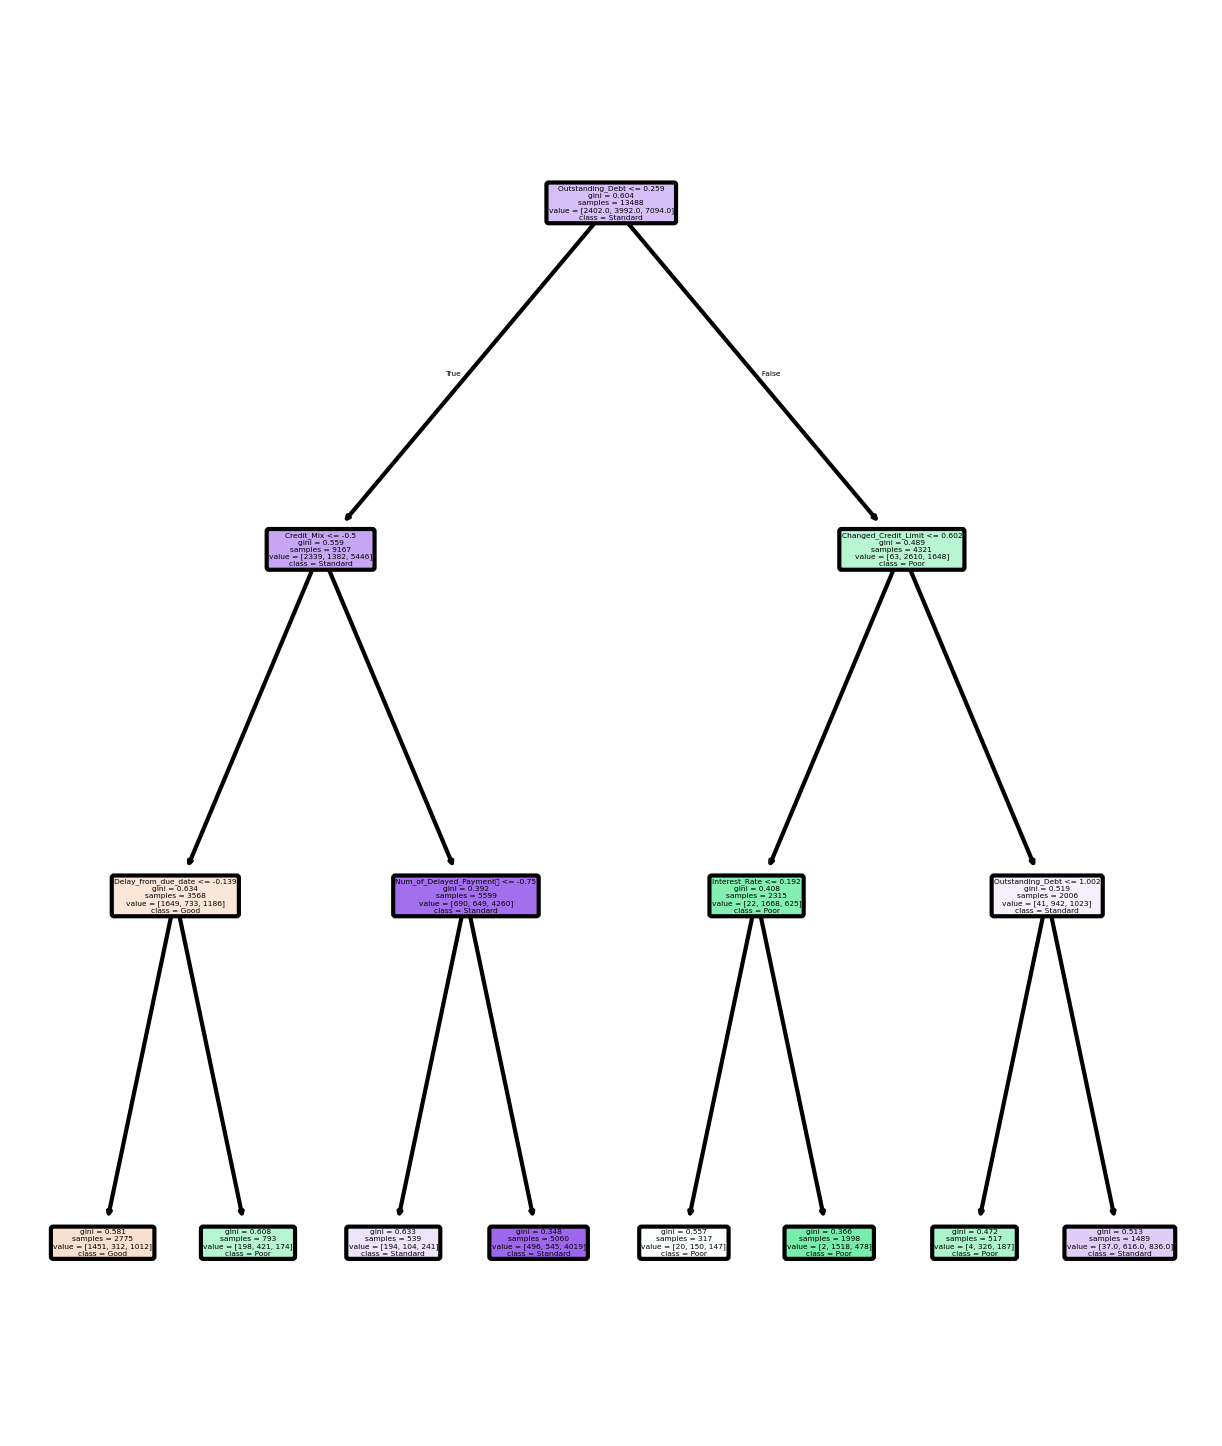

In [ ]:
plt.figure(dpi=300, figsize=(5, 6))
plot_tree(model, rounded=True, filled=True, class_names=class_names, feature_names=feature_names);

## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [ ]:
model_2 = DecisionTreeClassifier(max_depth=5,random_state=1234)
model_2.fit(scaled_data_vaild, y_encoded_vaild)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [ ]:
print("feature: ",model_2.tree_.feature)
print("------------------------------------------------")
print("threshold: ",model_2.tree_.threshold)
print("------------------------------------------------")
print("max_depth: ",model_2.tree_.max_depth)
print("------------------------------------------------")
print("node_count: ",model_2.tree_.node_count)

feature:  [11 10 10  5 35 -2 -2 -2  3  3 -2 -2  6 -2 -2  2 15 13 -2 -2 18 -2 -2  4
 35 -2 -2 11 -2 -2  8  4 11 -2 11 -2 -2 13  2 -2 -2  7 -2 -2 11  2 11 -2
 -2  1 -2 -2  8  3 -2 -2 35 -2 -2]
------------------------------------------------
threshold:  [ 0.25953206 -0.5        -1.5        12.875       0.05       -2.
 -2.         -2.         -0.50000001 -1.16666669 -2.         -2.
  0.52777779 -2.         -2.         -0.875      -0.04122716 -0.156
 -2.         -2.          0.08985436 -2.         -2.          0.5769231
 -0.94999999 -2.         -2.          0.07873329 -2.         -2.
  0.50712556  0.1923077   0.26213393 -2.          0.74120581 -2.
 -2.         -0.95199999 -0.125      -2.         -2.          1.25
 -2.         -2.          1.57175112 -0.375       0.86481124 -2.
 -2.         -0.40650818 -2.         -2.          1.98709333  0.16666667
 -2.         -2.          0.79999998 -2.         -2.        ]
------------------------------------------------
max_depth:  5
------------------

In [ ]:
predictions_vaild_2 = model_2.predict(scaled_data_vaild)

In [ ]:
print(classification_report(y_encoded_vaild, predictions_vaild_2))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64       448
           1       0.76      0.60      0.67       683
           2       0.77      0.73      0.75      1230

    accuracy                           0.70      2361
   macro avg       0.69      0.71      0.69      2361
weighted avg       0.72      0.70      0.71      2361



/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


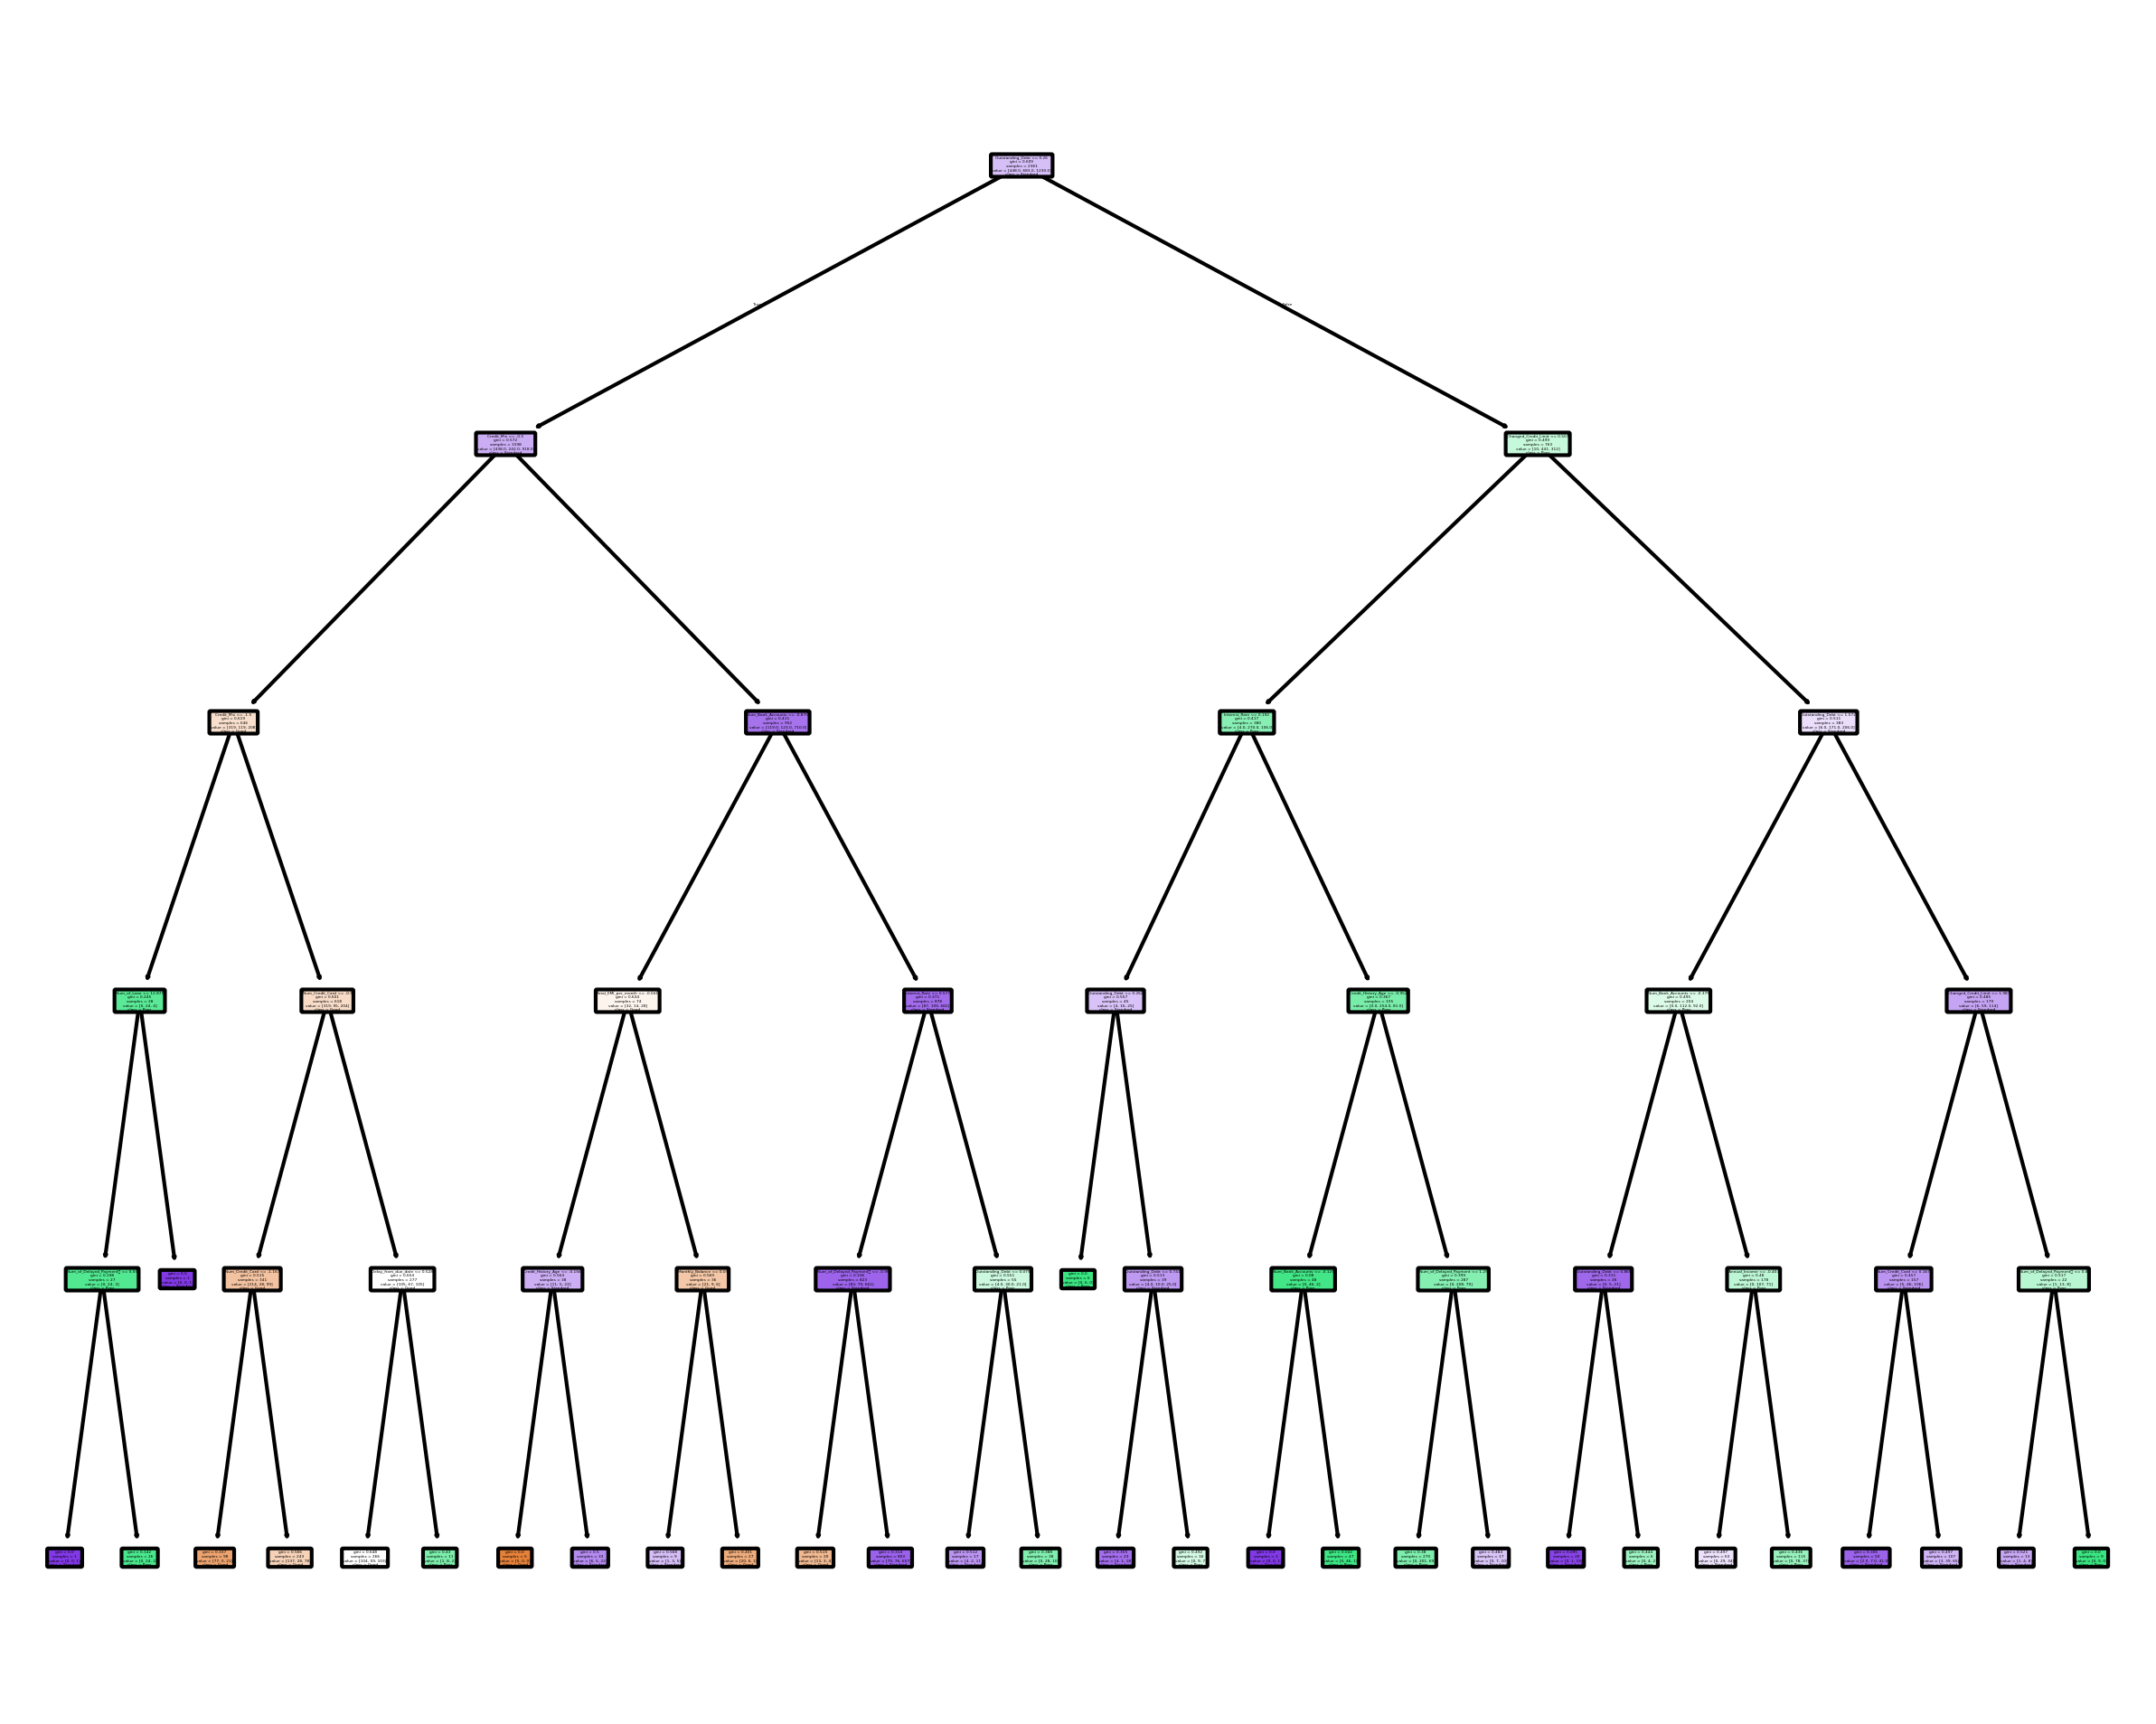

In [ ]:
plt.figure(dpi=300, figsize=(10, 8))
plot_tree(model_2, rounded=True, filled=True, class_names=class_names, feature_names=feature_names);

## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [ ]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tuned_tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tuned_tree, param_grid=param_grid,cv=3, verbose=True)

In [ ]:
grid_search.fit(scaled_data_vaild, y_encoded_vaild)


Fitting 3 folds for each of 1620 candidates, totalling 4860 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             verbose=True)

In [ ]:
print("best accuracy: ", grid_search.best_score_)
print("best parameters: ",grid_search.best_params_)
print(grid_search.best_estimator_)

best accuracy:  0.6705568191052772
best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=6, random_state=1)


In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
best_model.fit(scaled_data_vaild, y_encoded_vaild)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [ ]:
predictions_vaild_best = best_model.predict(scaled_data_vaild)

In [ ]:
print(classification_report(y_encoded_vaild, predictions_vaild_best))

              precision    recall  f1-score   support

           0       0.53      0.75      0.62      1723
           1       0.75      0.67      0.70      2763
           2       0.78      0.71      0.74      4939

    accuracy                           0.71      9425
   macro avg       0.68      0.71      0.69      9425
weighted avg       0.72      0.71      0.71      9425



## 💡📉 accuracy : 71

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


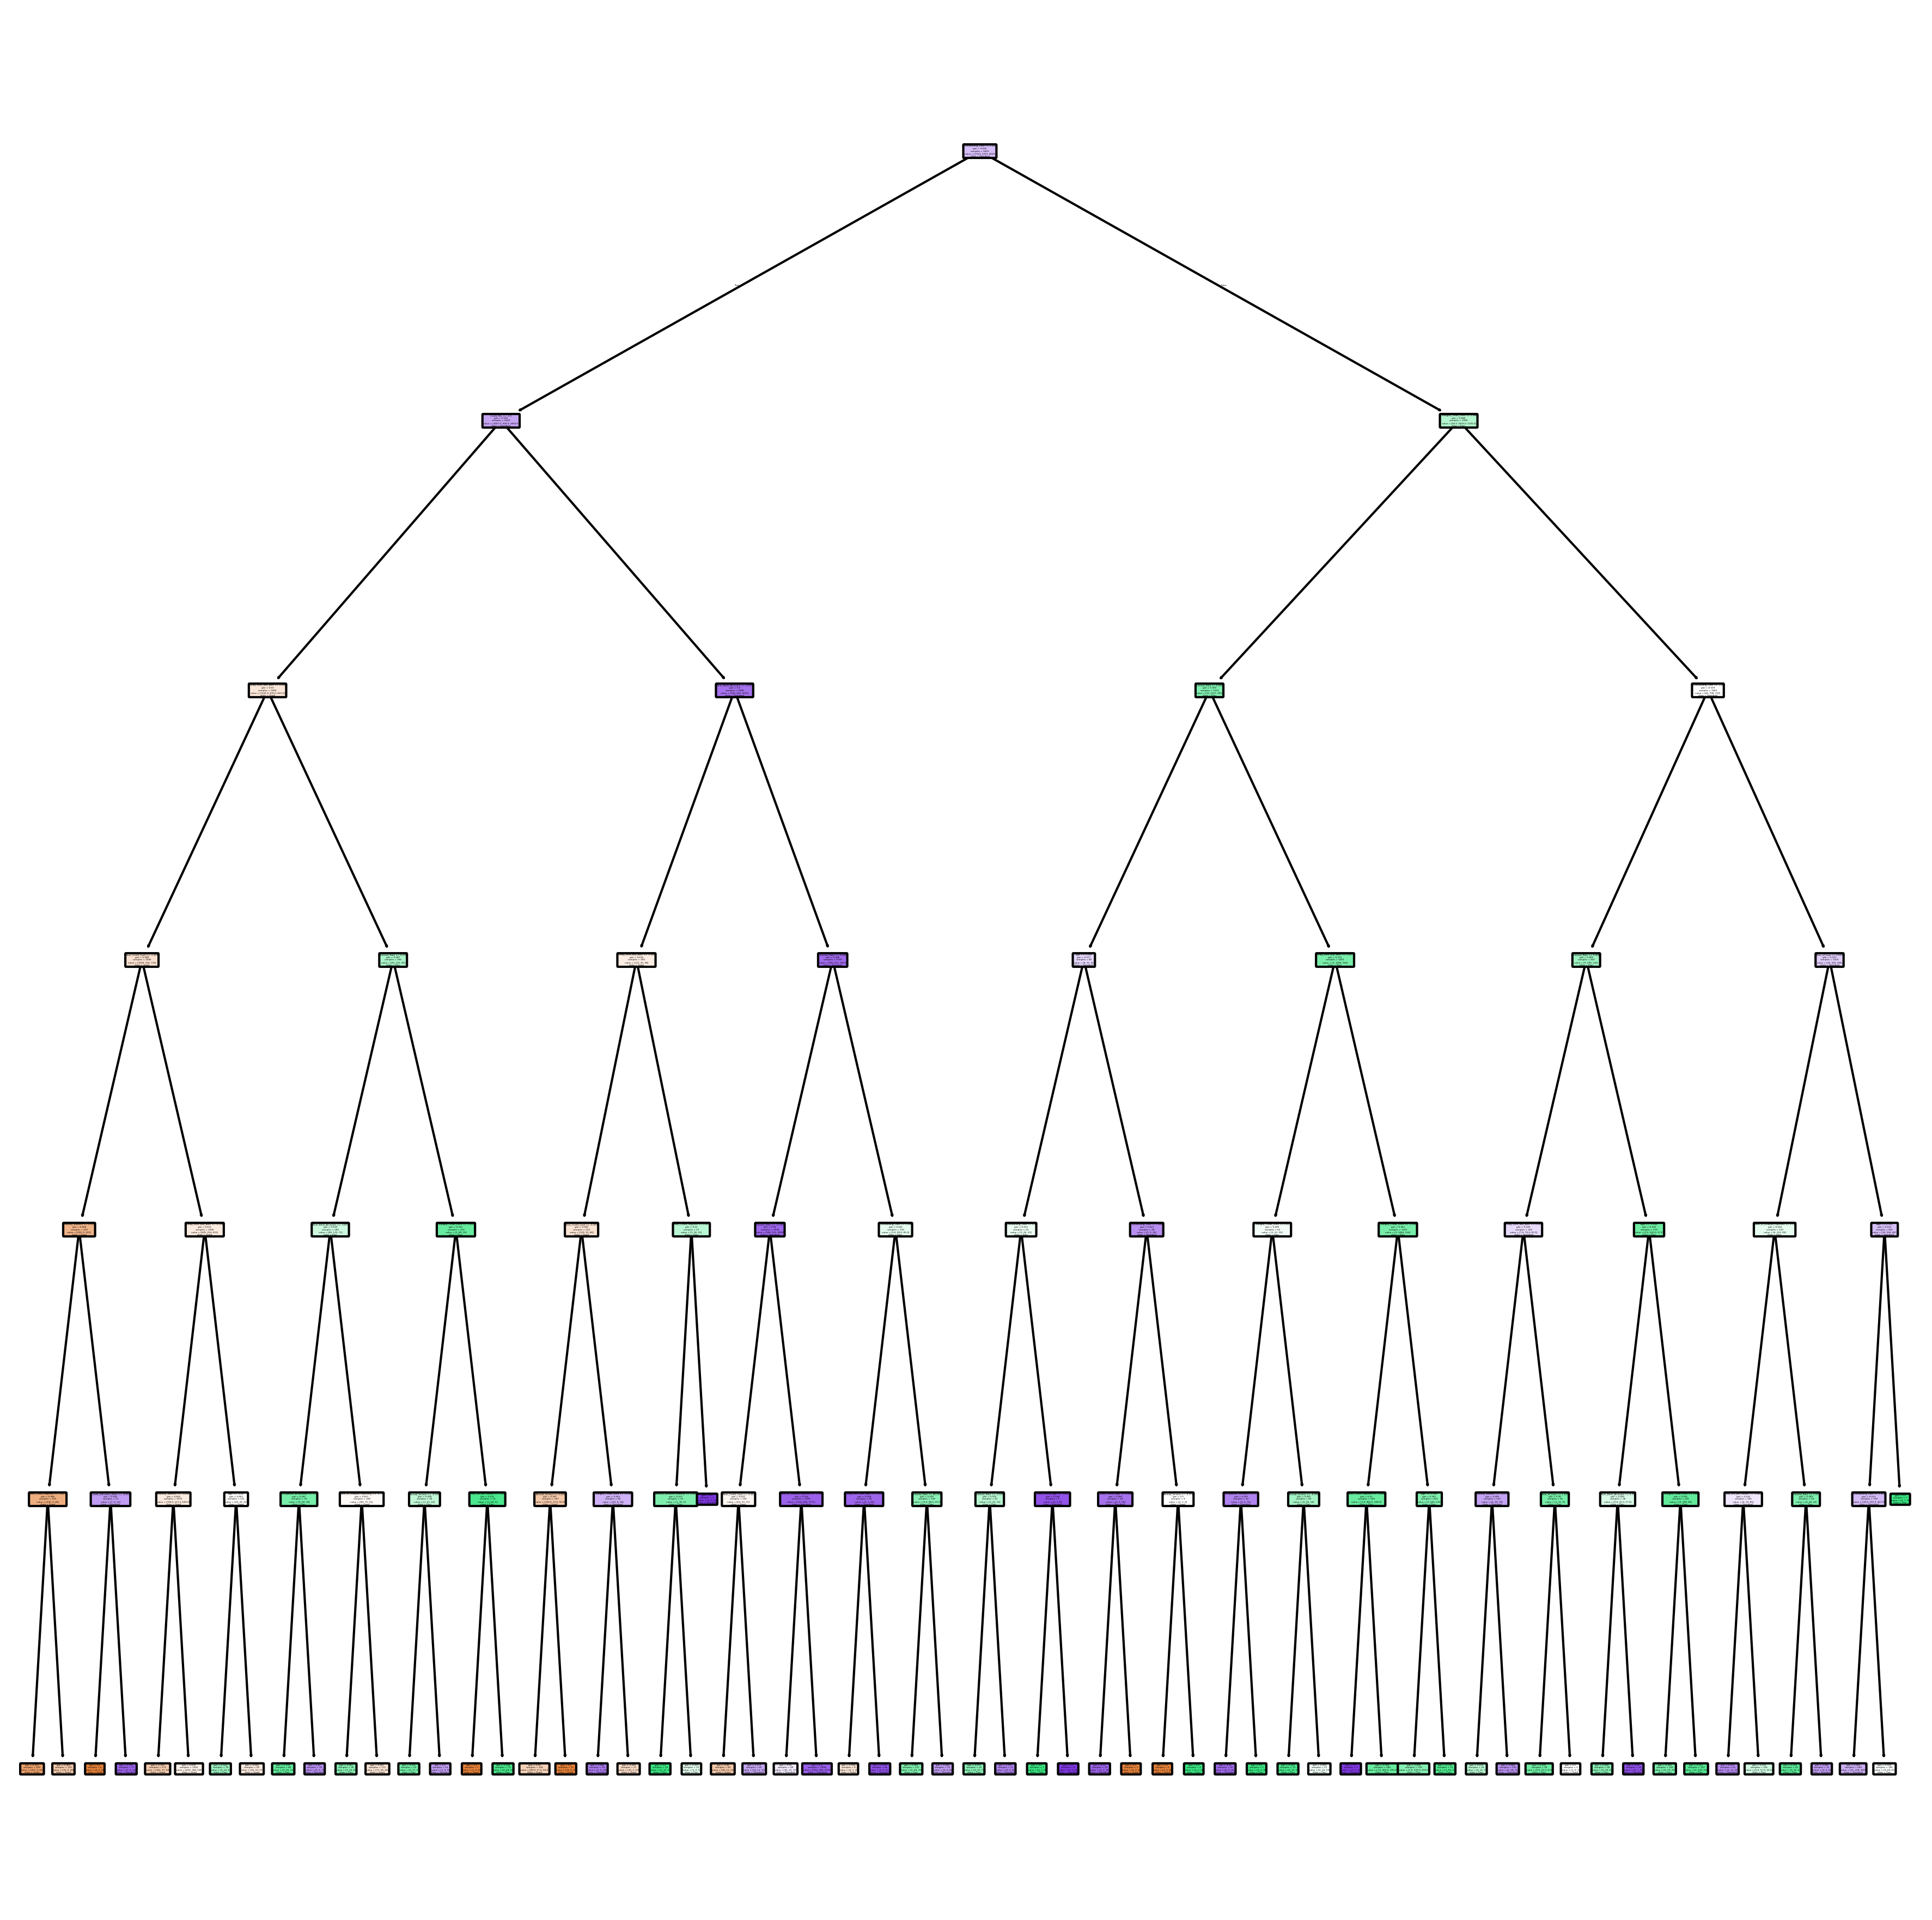

In [ ]:
plt.figure(dpi=300, figsize=(15, 15))
plot_tree(best_model, rounded=True, filled=True, class_names=class_names, feature_names=feature_names);

## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [ ]:
feature_importances=best_model.feature_importances_


In [ ]:
feature_importances

array([0.01260371, 0.00611741, 0.05004218, 0.02173914, 0.08879512,
       0.00437975, 0.0756023 , 0.01526397, 0.05646472, 0.00677589,
       0.23665645, 0.39820251, 0.00233724, 0.00250616, 0.        ,
       0.00434281, 0.00124972, 0.        , 0.00834377, 0.00262895,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00123843, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00470978])

<ipython-input-231-964b1ceb6a87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'], palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


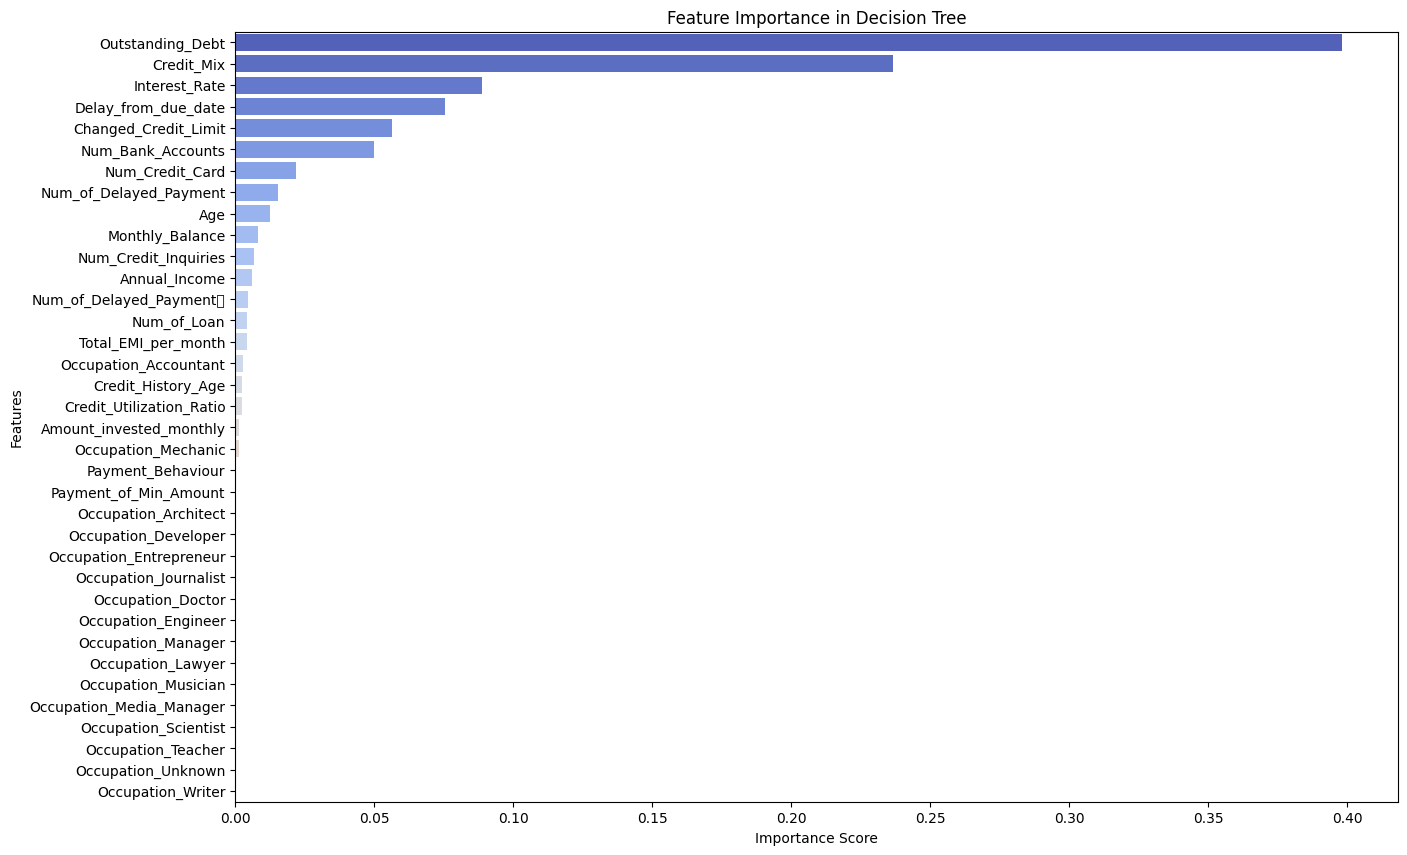

In [ ]:
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'], palette='coolwarm')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.show()

Feature: 0, Score: 0.01260
Feature: 1, Score: 0.00612
Feature: 2, Score: 0.05004
Feature: 3, Score: 0.02174
Feature: 4, Score: 0.08880
Feature: 5, Score: 0.00438
Feature: 6, Score: 0.07560
Feature: 7, Score: 0.01526
Feature: 8, Score: 0.05646
Feature: 9, Score: 0.00678
Feature: 10, Score: 0.23666
Feature: 11, Score: 0.39820
Feature: 12, Score: 0.00234
Feature: 13, Score: 0.00251
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00434
Feature: 16, Score: 0.00125
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00834
Feature: 19, Score: 0.00263
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00124
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00471


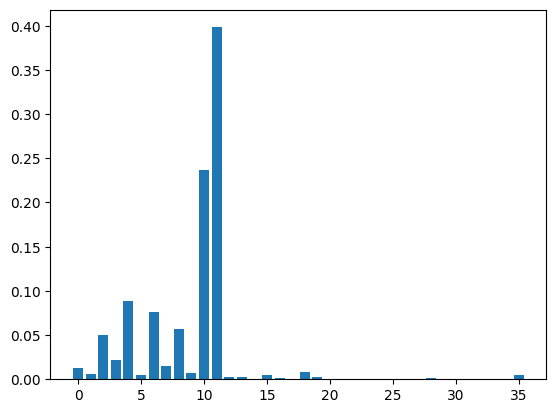

In [ ]:
for i, v in enumerate(feature_importances):
    print(f'Feature: {i}, Score: {v:.5f}')

# Plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.show()

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

## Xtest

In [ ]:
X_test=X_test.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan','Monthly_Inhand_Salary'], axis = 1)

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Replace unvalid value in column Num_of_Delayed_Payment

In [ ]:
X_test['Num_of_Delayed_Payment'].unique()

array(['3', '16', '6', '18', '1', '26', '8', 'nan', '14', '13', '5', '7',
       '9', '19', '21', '12', '15', '17', '25', '20', '4', '10', '22',
       '23', '2', '11', '24', '27', '28', '0', '1541', '3491', '3104',
       '809', '904', '3623', '3200', '2508', '1154', '3402', '3559',
       '519', '3208', '426', '3107', '4011', '84', '3684', '1890', '583',
       '2943', '4293', '775', '2185', '1598', '130', '3545', '3447',
       '739', '1749', '3539', '196'], dtype=object)

In [ ]:
def replace_value(col):

    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

In [ ]:
X_test['Num_of_Delayed_Payment']=replace_value('Num_of_Delayed_Payment')
X_test['Num_of_Delayed_Payment'].unique()

array(['3', '16', '6', '18', '1', '26', '8', 'nan', '14', '13', '5', '7',
       '9', '19', '21', '12', '15', '17', '25', '20', '4', '10', '22',
       '23', '2', '11', '24', '27', '28', '0', '1541', '3491', '3104',
       '809', '904', '3623', '3200', '2508', '1154', '3402', '3559',
       '519', '3208', '426', '3107', '4011', '84', '3684', '1890', '583',
       '2943', '4293', '775', '2185', '1598', '130', '3545', '3447',
       '739', '1749', '3539', '196'], dtype=object)

#### Replace unvalid value in column  Age

In [ ]:
X_test['Age']=replace_value('Age')
X_test['Age']

,Age
42391,26
26378,27
29042,32
38975,23
594,35
...,...
37608,22
40898,38
39318,41
59919,53


#### convert Age column into numeric

In [ ]:
X_test['Age']=pd.to_numeric(X_test['Age'],downcast='float')

In [ ]:
X_test['Age'].unique()

array([  26.,   27.,   32.,   23.,   35.,   37.,   42.,   20.,   18.,
         30.,   43.,   36.,   49.,   21.,   40.,   39.,   33.,   53.,
         25.,   31., 1170.,   15.,  500.,   24.,   46.,   16.,   47.,
         19.,   28.,   44.,   45.,   48.,   34.,   54.,   14.,   51.,
         41.,   29.,   17.,   55.,   52., 2339.,   22.,   38.,   50.,
         56., 4879., 1357., 5046., 1363., 4196., 2171., 6846.,  252.,
       3899., 8592.,  879., 4583.,  637., 5413., 8049., 4510., 6248.,
       6456., 5074., 5957., 3492.,  925., 3642., 5478., 1753., 2751.,
        181., 4841., 6098., 1407., 6588., 5327.,  292., 5929., 4177.,
       3512., 4909., 4775., 5438., 6331., 1328., 2974., 5154., 7336.,
       4607.,  449., 2181., 5907., 4000., 6770., 5677., 5611., 4580.,
       7183., 5592., 4484.,  100., 7776., 7026., 1429., 4163., 3891.,
       5765., 4645., 8396., 6001., 7459., 7702., 3055., 2977.,  849.,
       8299., 6638., 6516., 5233., 6991., 1310.], dtype=float32)

In [ ]:
X_test['Age'].dtype

dtype('float32')

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


### handle unrealistic values

In [ ]:
X_test[X_test['Age'] < 0]['Age'].unique()

array([], dtype=float32)

In [ ]:
X_test[X_test['Age'] >100]['Age'].unique()

array([1170.,  500., 2339., 4879., 1357., 5046., 1363., 4196., 2171.,
       6846.,  252., 3899., 8592.,  879., 4583.,  637., 5413., 8049.,
       4510., 6248., 6456., 5074., 5957., 3492.,  925., 3642., 5478.,
       1753., 2751.,  181., 4841., 6098., 1407., 6588., 5327.,  292.,
       5929., 4177., 3512., 4909., 4775., 5438., 6331., 1328., 2974.,
       5154., 7336., 4607.,  449., 2181., 5907., 4000., 6770., 5677.,
       5611., 4580., 7183., 5592., 4484., 7776., 7026., 1429., 4163.,
       3891., 5765., 4645., 8396., 6001., 7459., 7702., 3055., 2977.,
        849., 8299., 6638., 6516., 5233., 6991., 1310.], dtype=float32)

In [ ]:
print(X_test[X_test['Age'] > 100].shape)

(107, 20)


In [ ]:
median_age = X_test['Age'].median()
X_test['Age'] = X_test['Age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
X_test['Age'].unique()

array([ 26.,  27.,  32.,  23.,  35.,  37.,  42.,  20.,  18.,  30.,  43.,
        36.,  49.,  21.,  40.,  39.,  33.,  53.,  25.,  31.,  34.,  15.,
        24.,  46.,  16.,  47.,  19.,  28.,  44.,  45.,  48.,  54.,  14.,
        51.,  41.,  29.,  17.,  55.,  52.,  22.,  38.,  50.,  56., 100.])

### Num_Credit_Inquiries

In [ ]:
X_test['Num_Credit_Inquiries'].unique()

array([3.000e+00, 8.000e+00, 1.000e+01, 1.000e+00,       nan, 0.000e+00,
       1.200e+01, 9.000e+00, 2.022e+03, 4.000e+00, 5.000e+00, 1.870e+03,
       2.000e+00, 7.000e+00, 1.300e+01, 1.400e+01, 6.000e+00, 1.100e+01,
       1.500e+01, 1.855e+03, 1.600e+01, 1.012e+03, 1.700e+01, 2.580e+03,
       5.890e+02, 7.390e+02, 1.113e+03, 5.360e+02, 7.570e+02, 2.036e+03,
       2.230e+03, 2.515e+03, 2.321e+03, 1.424e+03, 5.900e+01, 1.023e+03,
       1.922e+03, 2.227e+03, 2.187e+03, 5.200e+01, 1.565e+03, 2.597e+03,
       1.549e+03, 1.920e+03, 1.727e+03, 2.208e+03, 9.990e+02, 4.210e+02,
       9.200e+02, 1.278e+03, 1.936e+03, 1.952e+03, 1.468e+03, 2.030e+02,
       7.800e+01, 1.196e+03, 2.565e+03, 1.000e+03, 1.050e+03, 1.266e+03,
       1.202e+03, 2.310e+03, 1.582e+03, 3.640e+02, 1.775e+03, 2.078e+03,
       1.768e+03, 2.473e+03, 1.203e+03, 9.460e+02, 2.250e+03, 4.600e+01,
       1.872e+03, 1.555e+03, 3.180e+02, 1.313e+03, 2.450e+02, 1.343e+03,
       1.216e+03, 1.188e+03, 1.070e+02])

In [ ]:
X_test['Num_Credit_Inquiries']=X_test['Num_Credit_Inquiries'].fillna(X_test['Num_Credit_Inquiries'].median())

In [ ]:
X_test['Num_Credit_Inquiries'] = pd.to_numeric(X_test['Num_Credit_Inquiries'], errors='coerce')

In [ ]:
X_test['Num_Credit_Inquiries'].dtype

dtype('float64')

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Check Credit_History_Age

In [ ]:
X_test['Credit_History_Age'].unique()

array(['15 Years and 11 Months', '21 Years and 9 Months',
       '12 Years and 10 Months', '20 Years and 8 Months',
       '32 Years and 10 Months', '28 Years and 9 Months',
       '31 Years and 9 Months', '6 Years and 2 Months',
       '8 Years and 7 Months', '8 Years and 0 Months', nan,
       '20 Years and 2 Months', '11 Years and 4 Months',
       '19 Years and 8 Months', '25 Years and 5 Months',
       '16 Years and 8 Months', '19 Years and 0 Months',
       '12 Years and 5 Months', '2 Years and 0 Months',
       '16 Years and 5 Months', '30 Years and 4 Months',
       '6 Years and 10 Months', '9 Years and 0 Months',
       '8 Years and 3 Months', '1 Years and 11 Months',
       '32 Years and 7 Months', '19 Years and 7 Months',
       '26 Years and 8 Months', '31 Years and 0 Months',
       '6 Years and 3 Months', '9 Years and 4 Months',
       '7 Years and 3 Months', '20 Years and 10 Months',
       '8 Years and 6 Months', '10 Years and 8 Months',
       '24 Years and 1 Months', 

#### Convert Credit_History_Age into years and fill missing

In [ ]:
def convert_to_years(value):
    if pd.isna(value):
        return np.nan

    parts = value.split(' ')

    if len(parts) >= 4:
        years = int(parts[0])
        months = int(parts[3])
        total_years = years + (months / 12)
        return round(total_years, 2)
    else:
        return np.nan


In [ ]:
X_test['Credit_History_Age']= X_test['Credit_History_Age'].apply(convert_to_years)

In [ ]:
X_test['Credit_History_Age']=X_test['Credit_History_Age'].fillna(X_test['Credit_History_Age'].median())

In [ ]:
X_test['Credit_History_Age'].unique()

array([15.92, 21.75, 12.83, 20.67, 32.83, 28.75, 31.75,  6.17,  8.58,
        8.  , 18.58, 20.17, 11.33, 19.67, 25.42, 16.67, 19.  , 12.42,
        2.  , 16.42, 30.33,  6.83,  9.  ,  8.25,  1.92, 32.58, 19.58,
       26.67, 31.  ,  6.25,  9.33,  7.25, 20.83,  8.5 , 10.67, 24.08,
       17.58, 15.67, 14.75, 30.5 , 31.17, 18.42, 17.08,  4.25,  2.92,
       19.75,  8.67,  9.75, 13.42, 23.  , 11.83, 28.25,  6.58, 21.58,
       21.08, 10.83, 24.92, 28.58, 24.42, 31.08, 15.25, 30.  , 16.92,
       19.08, 33.25, 12.  , 15.17, 20.33,  1.25, 22.33, 10.58, 16.25,
       18.08, 32.67, 21.  , 19.17, 16.58, 29.92,  8.33, 21.33,  5.58,
       32.42, 14.42,  9.17,  9.58, 21.5 ,  1.58, 23.83, 20.58, 30.75,
       27.08,  0.58, 18.92, 30.08, 20.5 , 18.  , 28.92, 25.17, 22.08,
       28.5 , 21.17, 14.92, 19.83, 33.42, 26.33, 18.67,  6.  , 14.08,
       11.58, 17.  , 30.25,  0.75, 27.33, 28.67, 25.33, 24.25, 25.92,
       21.42, 19.33, 17.33, 10.75,  9.92, 24.67,  2.67, 16.75, 18.33,
       15.75, 32.92,

#### Check if any outliers

In [ ]:
X_test[X_test['Credit_History_Age'] >35]['Credit_History_Age'].unique()

array([], dtype=float64)

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### fill missing in Payment_of_Min_Amount it has one null value

In [ ]:
X_test['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
X_test['Payment_of_Min_Amount']=X_test['Payment_of_Min_Amount'].fillna(X_test['Payment_of_Min_Amount'].mode()[0])

#### Encoding Payment_of_Min_Amount

In [ ]:
X_test['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
X_test['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,2075
No,1484
NM,481


In [ ]:
X_test['Payment_of_Min_Amount'] = X_test['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

<ipython-input-333-ec53c83531ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Payment_of_Min_Amount'] = X_test['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:
X_test['Payment_of_Min_Amount'].unique()

array([0, 2, 1])

In [ ]:
X_test['Payment_of_Min_Amount'].dtype

dtype('int64')

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


##### Total_EMI_per_month

In [ ]:
X_test['Total_EMI_per_month']=X_test['Total_EMI_per_month'].fillna(X_test['Total_EMI_per_month'].median())

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Amount_invested_monthly

In [ ]:
X_test['Amount_invested_monthly'].unique()

array(['455.70790077580904', '146.88119174133269', '707.5509432120108',
       ..., '368.61792037009803', '42.750263898269694',
       '420.0597783376661'], dtype=object)

In [ ]:
X_test['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
X_test['Amount_invested_monthly'] = pd.to_numeric(X_test['Amount_invested_monthly'], errors='coerce')

In [ ]:
X_test['Amount_invested_monthly']=X_test['Amount_invested_monthly'].fillna(X_test['Amount_invested_monthly'].median())

In [ ]:
X_test['Amount_invested_monthly'].dtype

dtype('float64')

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Handle Payment_Behaviour

In [ ]:
X_test['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments'], dtype=object)

In [ ]:
X_test['Payment_Behaviour']=X_test['Payment_Behaviour'].replace('!@9#%8','unknown')

In [ ]:
X_test['Payment_Behaviour']=X_test['Payment_Behaviour'].replace("unknown", X_test['Payment_Behaviour'].mode()[0])

In [ ]:
X_test['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments'], dtype=object)

In [ ]:
X_test['Payment_Behaviour']=X_test['Payment_Behaviour'].fillna(X_test['Payment_Behaviour'].mode()[0])

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


##### Encoding Payment_Behaviour

In [ ]:
encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
X_test['Payment_Behaviour'] = encoder_ord.fit_transform(X_test[['Payment_Behaviour']])

In [ ]:
X_test['Payment_Behaviour'].unique()

array([2., 1., 0., 4., 5., 3.])

#### Monthly_Balance column

In [ ]:
X_test['Monthly_Balance'].unique()

array(['408.62969460595383', '266.28388558110316', '435.45005678798935',
       ..., '745.3603584360657', '575.1498194350638', '659.8422958382404'],
      dtype=object)

In [ ]:
X_test['Monthly_Balance'].dtype


dtype('O')

In [ ]:
X_test['Monthly_Balance'] = pd.to_numeric(X_test['Monthly_Balance'], errors='coerce')

In [ ]:
X_test['Monthly_Balance'].dtype

dtype('float64')

In [ ]:
X_test['Monthly_Balance']=X_valid['Monthly_Balance'].fillna(X_test['Monthly_Balance'].median())

In [ ]:
X_test.isna().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#### Occupation

In [ ]:
X_test['Occupation'].unique()

array(['Doctor', 'Entrepreneur', 'Journalist', 'Musician',
       'Media_Manager', 'Mechanic', 'Lawyer', 'Architect', '_______',
       'Developer', 'Manager', 'Writer', 'Scientist', 'Teacher',
       'Accountant', 'Engineer'], dtype=object)

In [ ]:
X_test['Occupation'] = X_test['Occupation'].replace("_______", "Unknown")

In [ ]:
X_test['Occupation'].unique()

array(['Doctor', 'Entrepreneur', 'Journalist', 'Musician',
       'Media_Manager', 'Mechanic', 'Lawyer', 'Architect', 'Unknown',
       'Developer', 'Manager', 'Writer', 'Scientist', 'Teacher',
       'Accountant', 'Engineer'], dtype=object)

#### occupation_encoded

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_test['Occupation'] = X_test['Occupation'].astype(str)
occupation_encoded = encoder.fit_transform(X_test[['Occupation']])


In [ ]:
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))
occupation_encoded_df.index = X_test.index
X_test = pd.concat([X_test, occupation_encoded_df], axis=1)
X_test.drop('Occupation', axis=1, inplace=True)

X_test.head()


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
42391,26.0,87843.69,1,4,2,3,11,3,0.64,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26378,27.0,17621.705,8,7,7,1,8,16,11.82,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29042,32.0,101628.12,3,7,14,0,16,6,18.25,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38975,23.0,17535.65,8,7,29,6,18,18,19.11,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
594,35.0,72330.98,0,3,11,1,1,6,_,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Handle Annual_Income

In [ ]:
X_test['Annual_Income'].unique()

array(['87843.69', '17621.705', '101628.12', ..., '50291.22', '105950.76',
       '115661.32'], dtype=object)

In [ ]:
X_test['Annual_Income']=replace_value('Annual_Income')
X_test['Annual_Income']

,Annual_Income
42391,87843.69
26378,17621.705
29042,101628.12
38975,17535.65
594,72330.98
...,...
37608,50291.22
40898,100831.95
39318,105950.76
59919,43044.01


In [ ]:
X_test['Annual_Income']=pd.to_numeric(X_test['Annual_Income'],downcast='float')

#### Num of Loan

In [ ]:
X_test['Num_of_Loan']=replace_value('Num_of_Loan')

In [ ]:
X_test['Num_of_Loan']=pd.to_numeric(X_test['Num_of_Loan'],downcast='float')

In [ ]:
X_test['Num_of_Loan'].unique()

array([3.000e+00, 1.000e+00, 0.000e+00, 6.000e+00, 2.000e+00, 5.000e+00,
       8.000e+00, 1.000e+02, 9.000e+00, 4.000e+00, 7.000e+00, 9.360e+02,
       5.960e+02, 3.200e+01, 9.040e+02, 1.370e+02, 1.354e+03, 1.430e+03,
       1.310e+02, 4.370e+02, 9.950e+02, 3.210e+02, 6.630e+02, 7.950e+02,
       8.600e+02, 8.140e+02, 9.500e+01, 5.900e+02, 3.720e+02, 4.660e+02,
       1.006e+03, 5.200e+01], dtype=float32)

In [ ]:
#Num_of_Delayed_Payment
X_test['Num_of_Delayed_Payment'].unique()
X_test['Num_of_Delayed_Payment']=X_test['Num_of_Delayed_Payment'].replace('nan',X_test['Monthly_Balance'].median())
X_test['Num_of_Delayed_Payment'].unique()
X_test['Num_of_Delayed_Payment	']=pd.to_numeric(X_test['Num_of_Delayed_Payment'],downcast='float')
X_test['Num_of_Delayed_Payment'].unique()
X_test.dtypes
# convert data type Changed_Credit_Limit
X_test['Changed_Credit_Limit'].unique()
X_test['Changed_Credit_Limit'] = pd.to_numeric(X_test['Changed_Credit_Limit'], errors='coerce')
X_test.dtypes
# Outstanding_Debt
X_test['Outstanding_Debt'] = X_test['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
X_test['Outstanding_Debt'] = pd.to_numeric(X_test['Outstanding_Debt'], errors='coerce')
# Credit_Mix
X_test['Credit_Mix'].unique()
mode_value = X_test['Credit_Mix'].mode()[0]
X_test['Credit_Mix']=X_test['Credit_Mix'].replace("_", mode_value)
X_test['Credit_Mix']
encoder_ord_mix = OrdinalEncoder(categories=[['Bad', 'Good', 'Standard']])
X_test['Credit_Mix'] = encoder_ord_mix.fit_transform(X_test[['Credit_Mix']])
X_test['Credit_Mix']

/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Credit_Mix
42391,1.0
26378,2.0
29042,2.0
38975,2.0
594,1.0
...,...
37608,0.0
40898,2.0
39318,2.0
59919,1.0


#### Credit_Score Column (the target)

In [ ]:

y_test=y_test.replace(np.nan, y_valid.mode()[0])
y_test.unique()
y_encoded_test = score_encoder.transform(y_test)
y_encoded_test

array([0, 2, 2, ..., 2, 0, 2])

In [ ]:
scaled_data_test=scaler.transform(X_test)
scaled_data_test

array([[-0.4375    ,  0.95031988, -1.25      , ...,  0.        ,
         0.        , -1.2       ],
       [-0.375     , -0.37485039,  0.5       , ...,  0.        ,
         0.        ,  0.1       ],
       [-0.0625    ,  1.21044806, -0.75      , ...,  0.        ,
         0.        , -0.9       ],
       ...,
       [ 0.5       ,  1.29202128,  0.        , ...,  0.        ,
         1.        ,  0.1       ],
       [ 1.25      ,  0.10489798, -0.25      , ...,  0.        ,
         0.        , -1.2       ],
       [ 0.25      ,  1.47527081,  0.5       , ...,  0.        ,
         0.        ,  0.3       ]])

# predict

In [ ]:
class_names = score_encoder.classes_
class_names

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
best_model.tree_.feature

array([11, 10,  6,  3, 18,  9, -2, -2, 12, -2, -2,  6, 18, -2, -2,  0, -2,
       -2,  4,  2, 19, -2, -2, 35, -2, -2,  8,  1, -2, -2, 15, -2, -2,  2,
        6,  3,  1, -2, -2,  8, -2, -2,  9, 16, -2, -2, -2,  4,  4,  3, -2,
       -2,  7, -2, -2, 11,  6, -2, -2,  4, -2, -2,  8,  4,  0, 11,  4, -2,
       -2, 13, -2, -2, 11, 13, -2, -2,  1, -2, -2,  6,  8, 28, -2, -2,  1,
       -2, -2,  8,  9, -2, -2,  0, -2, -2, 11,  4,  6, 18, -2, -2,  5, -2,
       -2,  0,  2, -2, -2,  8, -2, -2,  5,  7, 15, -2, -2,  4, -2, -2,  0,
       11, -2, -2, -2], dtype=int64)

In [ ]:
best_model.tree_.threshold

array([ 2.41073817e-01, -5.00000000e-01,  2.77777780e-02, -1.16666669e+00,
        3.51490140e+00, -4.16666672e-01, -2.00000000e+00, -2.00000000e+00,
       -1.06728738e-02, -2.00000000e+00, -2.00000000e+00, -1.38888892e-01,
       -2.17567325e-01, -2.00000000e+00, -2.00000000e+00, -2.50000000e-01,
       -2.00000000e+00, -2.00000000e+00,  1.25000004e-01, -8.75000000e-01,
        5.00000000e-01, -2.00000000e+00, -2.00000000e+00, -7.50000000e-01,
       -2.00000000e+00, -2.00000000e+00, -4.11673561e-01, -3.34280595e-01,
       -2.00000000e+00, -2.00000000e+00, -4.70045537e-01, -2.00000000e+00,
       -2.00000000e+00, -8.75000000e-01, -8.33333340e-02, -1.66666672e-01,
        2.25526071e+00, -2.00000000e+00, -2.00000000e+00, -2.92355374e-01,
       -2.00000000e+00, -2.00000000e+00,  8.33333358e-02,  6.11805909e-02,
       -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,  5.41666657e-01,
       -7.91666657e-01, -1.66666672e-01, -2.00000000e+00, -2.00000000e+00,
       -9.49999988e-01, -

In [ ]:
best_model.tree_.max_depth

6

In [ ]:
best_model.tree_.node_count

123

In [ ]:
feature_names = X_train.columns

In [ ]:
feature_names

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
predictions_test = best_model.predict(scaled_data_test)

In [ ]:
predictions_test

array([0, 2, 2, ..., 2, 0, 2])

In [ ]:
print(classification_report(y_encoded_test, predictions_test))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60       705
           1       0.71      0.64      0.67      1185
           2       0.76      0.67      0.72      2150

    accuracy                           0.68      4040
   macro avg       0.66      0.69      0.66      4040
weighted avg       0.70      0.68      0.68      4040



####💡 accuracy: 68

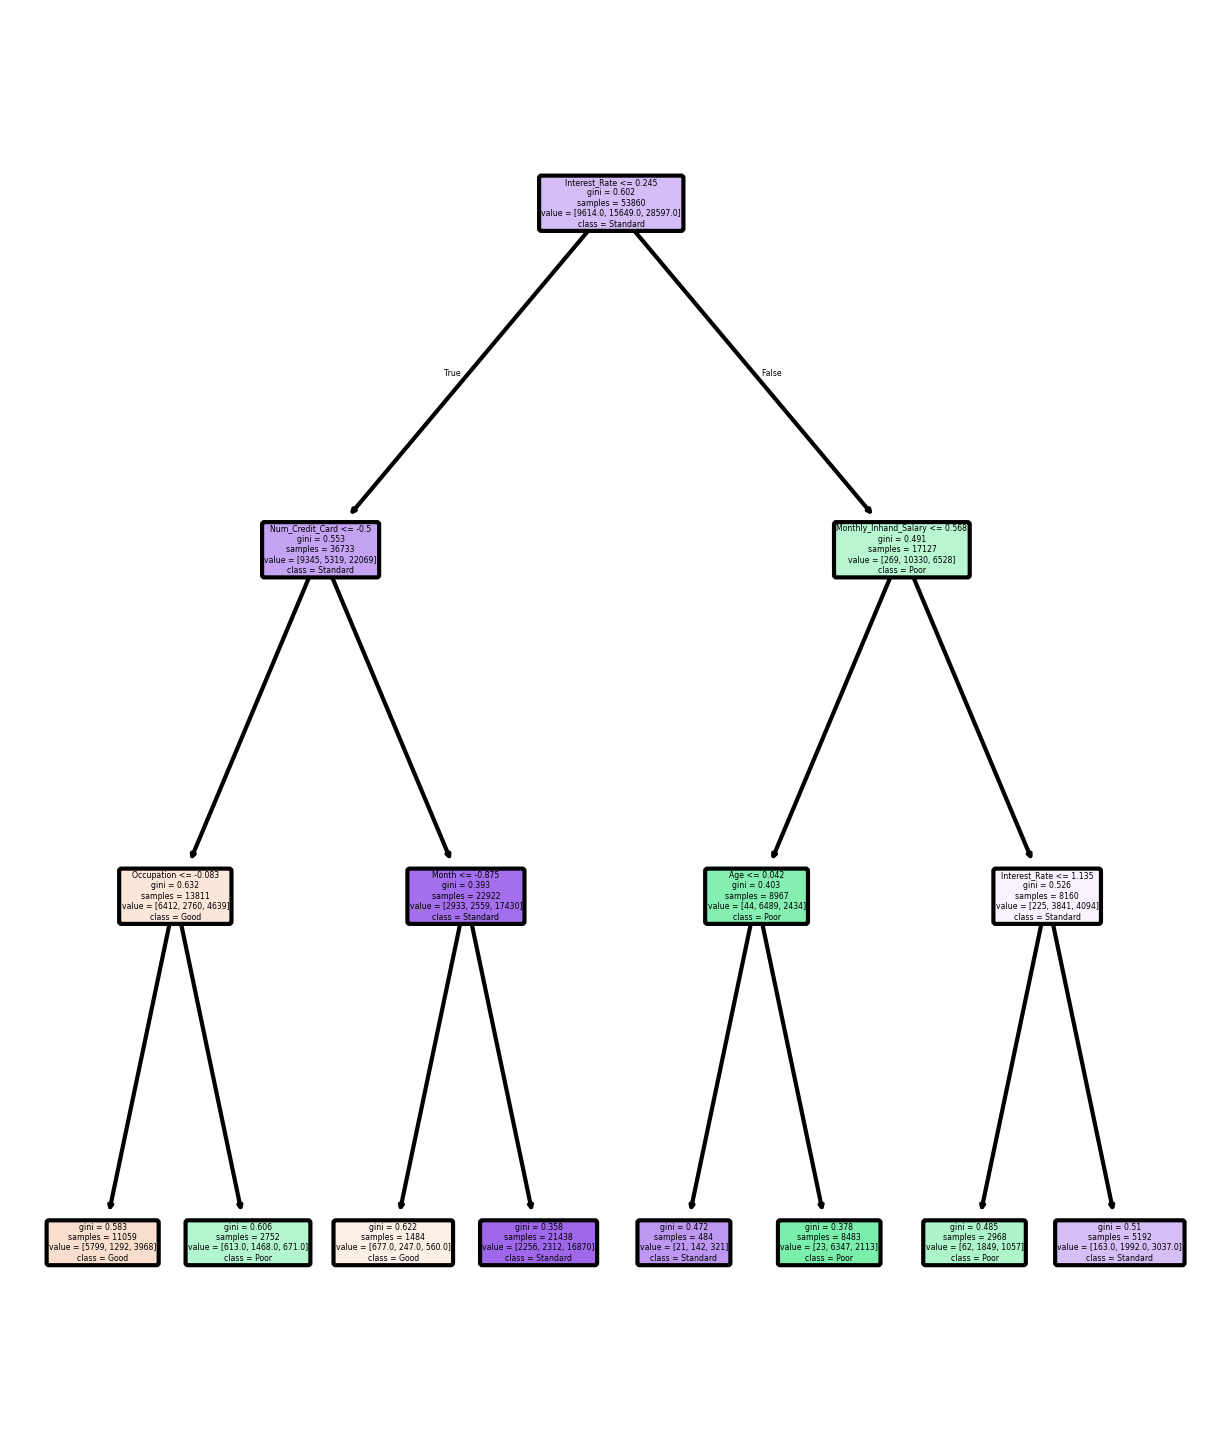

In [ ]:
plt.figure(dpi=300, figsize=(5, 6))
plot_tree(model, rounded=True, filled=True, class_names=class_names, feature_names=feature_names);

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$